# Analyzing Demographic and Voting Trends within Top 10 Countries

## Summary
This notebook analyzes trends demographic and voting trends among the top 10 countries with the largest Brazilian immigrant Populations (as of 2018). These countries are:
  * The United States
  * Japan
  * Portugal
  * The United Kingdom
  * Italy
  * Germany
  * Canada
  * Spain
  * Switzerland
  * France

## Importing and Combining Data
The following code imports the (cleaned) individual datasets and subsequently creates a single Pandas dataframe combining the data from all six data sets.

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def combine_data(*dfs):
    '''
    Combines multiple dataframes into a single Pandas dataframe
    :param dfs - a comma separated collection of dataframes
    :return a new Pandas dataframe with all dataframes combined

    '''
    dfs = list(dfs) #Convert to list
    
    df = dfs[0].copy() #Extract first element
    
    #Add remaining elements
    for dataframe in dfs[1:]:
        df = df.append(dataframe, ignore_index=True)

    return df

In [3]:
df_1998 = pd.read_csv('../data/clean/perfil_eleitorado_1998.csv')
df_2002 = pd.read_csv('../data/clean/perfil_eleitorado_2002.csv')
df_2006 = pd.read_csv('../data/clean/perfil_eleitorado_2006.csv')
df_2010 = pd.read_csv('../data/clean/perfil_eleitorado_2010.csv')
df_2014 = pd.read_csv('../data/clean/perfil_eleitorado_2014.csv')
df_2018 = pd.read_csv('../data/clean/perfil_eleitorado_2018.csv')

In [6]:
#Create Combined Data Frame (all years)
df_combined = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
print("Aggregate Data")
df_combined

Aggregate Data


Unnamed: 0  election_year place_(zz_=_exterior)  municipality_code  \
0               0           1998                    ZZ              11487   
1               1           1998                    ZZ              98361   
2               2           1998                    ZZ              98965   
3               3           1998                    ZZ              98507   
4               4           1998                    ZZ              98620   
...           ...            ...                   ...                ...   
76996       33635           2018                    ZZ              29190   
76997       33636           2018                    ZZ              29190   
76998       33637           2018                    ZZ              29190   
76999       33638           2018                    ZZ              29190   
77000       33639           2018                    ZZ              29190   

      municipality_name  gender_code gender_description  marital_status_code  \
0               POLONIA            2          MASCULINO                 -3.0   
1               NIGERIA            2          MASCULINO                 -3.0   
2                ANGOLA            2          MASCULINO                 -3.0   
3            COSTA RICA            4           FEMININO                 -3.0   
4              BULGARIA            4           FEMININO                 -3.0   
...                 ...          ...                ...                  ...   
76996           JAMAICA            2          MASCULINO                  3.0   
76997           JAMAICA            2          MASCULINO                  3.0   
76998           JAMAICA            2          MASCULINO                  9.0   
76999           JAMAICA            4           FEMININO                  3.0   
77000           JAMAICA            4           FEMININO                  3.0   

      marital_status_description  age_group_code age_group_description  \
0                            #NE            -3.0                   #NE   
1                            #NE            -3.0                   #NE   
2                            #NE            -3.0                   #NE   
3                            #NE            -3.0                   #NE   
4                            #NE            -3.0                   #NE   
...                          ...             ...                   ...   
76996                     CASADO          5559.0          45 A 59 ANOS   
76997                     CASADO          6569.0          60 A 69 ANOS   
76998                 DIVORCIADO          5559.0          45 A 59 ANOS   
76999                     CASADO          4549.0          45 A 59 ANOS   
77000                     CASADO          5054.0          45 A 59 ANOS   

       educational_attainment_code educational_attainment_description  \
0                                0                      NAO INFORMADO   
1                                0                      NAO INFORMADO   
2                                0                      NAO INFORMADO   
3                                0                      NAO INFORMADO   
4                                0                      NAO INFORMADO   
...                            ...                                ...   
76996                            8                  SUPERIOR COMPLETO   
76997                            7                SUPERIOR INCOMPLETO   
76998                            7                SUPERIOR INCOMPLETO   
76999                            6              ENSINO MEDIO COMPLETO   
77000                            8                  SUPERIOR COMPLETO   

       quantity_of_voters  
0                      57  
1                      44  
2                      95  
3                      95  
4                      12  
...                   ...  
76996                   3  
76997                   1  
76998                   1  
76999                   1  
77000                   1  

[77001 rows x 14 c

## Extracting Top 10 Countries
The below code extracts the top 10 countries (by 2018 population) from the electorate dataset to create a new dataframe

In [7]:
def calculate_country_pop(df):
    '''
    Determines Population among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country populations
    '''
    
    #Combine all voters by municipality code, country name, and year
    countries = df.groupby(["municipality_code", "municipality_name", "election_year"]).quantity_of_voters.sum().unstack()
    
    #Fills Nans with 0's
    countries = countries.fillna(0)
    
    
    return countries

In [29]:
def calculate_country_growth(df, ignore_init=False):
    '''
    Calculates country growth rate among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country growth rate
    '''
    
    #Source - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html
    pct_change = df.pct_change(axis='columns', periods=1)
    
    if ignore_init:
        #Replace infinities with Nans
        #Source - https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas
        pct_change.replace([np.inf, -np.inf], 100, inplace=True)
    else:
        pct_change.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    #Fills Nans with 0's
    pct_change = pct_change.fillna(0)

    return pct_change

In [30]:
def get_top_N(total_data, sorted_countries, N:int):
    '''
    Extracts the top N countries from a sorted list by getting the top N country names
    from the list and then filtering the aggregate dataset to only include those
    countries
    :param total_data - The aggregate dataset (df_combined in our case)
    :param sorted_countries - A sorted dataframe of dataset elements (in our case, elements
                              sorted by total number of voters in 2018)
    :param N - The number of countries to extract
    :return A new dataframe containing only the top N countries
    '''
    
    #Extract Names of top 10 countries
    top_N_country_names = list(pd.DataFrame(sorted_countries.reset_index()).municipality_name[:N])
    
    #Filter dataframe to only include top 10 countries
    #Source - https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
    top_N = total_data[pd.DataFrame(total_data["municipality_name"].tolist()).isin(top_N_country_names).any(1).values].reset_index()
    
    
    return top_N

In [31]:
#Group Countries by population
countries = calculate_country_pop(df_combined)

#Sort Countries to ensure we have the top 10 countries for 2018 (by population)
countries_2018 = countries.sort_values(by=[2018], ascending=False)

#Filter Dataset to only include top 10 countries
top_10 = get_top_N(df_combined, countries_2018, 10)

#Sort Top 10 by election year (descending)
top_10 = top_10.sort_values(by=['election_year', 'quantity_of_voters'], ascending=False)
top_10

index  Unnamed: 0  election_year place_(zz_=_exterior)  \
27484  56700       13339           2018                    ZZ   
31790  65255       21894           2018                    ZZ   
22111  45479        2118           2018                    ZZ   
35327  72024       28663           2018                    ZZ   
21400  43867         506           2018                    ZZ   
...      ...         ...            ...                   ...   
2         15          15           1998                    ZZ   
7         89          89           1998                    ZZ   
9         99          99           1998                    ZZ   
19       174         174           1998                    ZZ   
0          9           9           1998                    ZZ   

       municipality_code municipality_name  gender_code gender_description  \
27484              98841        INGLATERRA            4           FEMININO   
31790              11266    ESTADOS UNIDOS            4           FEMININO   
22111              11266    ESTADOS UNIDOS            4           FEMININO   
35327              11266    ESTADOS UNIDOS            4           FEMININO   
21400              11266    ESTADOS UNIDOS            4           FEMININO   
...                  ...               ...          ...                ...   
2                  98841        INGLATERRA            2          MASCULINO   
7                  11240           ESPANHA            4           FEMININO   
9                  11380             JAPAO            2          MASCULINO   
19                 11380             JAPAO            4           FEMININO   
0                  11240           ESPANHA            2          MASCULINO   

       marital_status_code marital_status_description  age_group_code  \
27484                  3.0                     CASADO          3539.0   
31790                  3.0                     CASADO          4044.0   
22111                  3.0                     CASADO          4549.0   
35327                  3.0                     CASADO          4044.0   
21400                  3.0                     CASADO          3539.0   
...                    ...                        ...             ...   
2                     -3.0                        #NE            -3.0   
7                     -3.0                        #NE            -3.0   
9                     -3.0                        #NE            -3.0   
19                    -3.0                        #NE            -3.0   
0                     -3.0                        #NE            -3.0   

      age_group_description  educational_attainment_code  \
27484          35 A 44 ANOS                            8   
31790          35 A 44 ANOS                            8   
22111          45 A 59 ANOS                            8   
35327          35 A 44 ANOS                            6   
21400          35 A 44 ANOS                            6   
...                     ...                          ...   
2                       #NE                            0   
7                       #NE                            0   
9                       #NE                            0   
19                      #NE                            0   
0                       #NE                            0   

      educational_attainment_description  quantity_of_voters  
27484                  SUPERIOR COMPLETO                 826  
31790                  SUPERIOR COMPLETO                 822  
22111                  SUPERIOR COMPLETO                 813  
35327              ENSINO MEDIO COMPLETO                 773  
21400              ENSINO MEDIO COMPLETO                 771  
...                                  ...                 ...  
2                          NAO INFORMADO                 596  
7                          NAO INFORMADO                 424  
9                          NAO INFORMADO                 337  
19                         NAO INFORMADO                 288 

## Analysis of Top 10 Population Size and Growth

In [32]:
def plot_top_10_populations(df_top10, df_combined):
    '''
    Plots the populations of the top 10 countries across all years (plus the average population of the dataset by year)
    :param df_top10 - A pandas datafram containing the top 10 countries
    :param df_combined - A pandas dataframe containing all countries
    '''
    years = df_combined.election_year.unique()
    
    countries = df_top10.municipality_name.unique()
    
    for country in countries:
        df_country = df_top10[df_top10["municipality_name"] == country]
        sum_pop = []
        for year in years:
            df_year = df_country[df_country["election_year"] == year]
            sum_all = df_year["quantity_of_voters"].sum()
            sum_pop.append(sum_all)
        
        plt.plot(years, sum_pop, label = str(country))
    
    #Calculate dataset average pop by year
    avg_pops = []
    for year in years:
        df_year = df_combined[df_combined["election_year"] == year]
        sum_all = df_year["quantity_of_voters"].sum()
        num_countries = df_year["municipality_name"].nunique()
        avg_pops.append(sum_all/num_countries)
        
    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (12,10)
    
    plt.plot(years, avg_pops, '--', label ="Dataset Average")
    
    plt.xticks(years)
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.legend(loc="best")
    plt.title("Populations of Top 10 Countries")
#     plt.savefig("../readme_images/top_10_populations.png", facecolor='w')
    plt.show()

### Top 10 Population Sizes
Below, we plot the electorate populations in the top 10 countries by year. As of 2018, the top 3 countries are the US, Japan, and Portugal

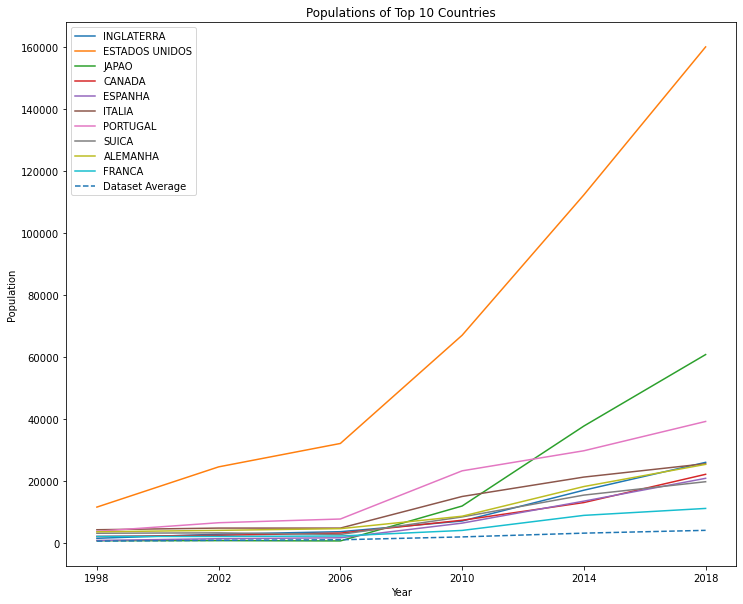

In [33]:
#Plot Populations
plot_top_10_populations(top_10, df_combined)

In [34]:
def plot_top_10_populations_growth(df_top10, df_combined):
    '''
    Plots the voter population growth rates of the top 10 countries across all years (plus the average population of the dataset by year)
    :param df_top10 - A pandas datafram containing the top 10 countries
    :param df_combined - A pandas dataframe containing all countries
    '''
    years = df_combined.election_year.unique()
    
    countries = df_top10.municipality_name.unique()
    
    for country in countries:
        df_country = df_top10[df_top10["municipality_name"] == country]
        growth = []
        for year in years[1:]:
            last_year = year - 4
            prev_year_pop = df_country[df_country["election_year"] == last_year].quantity_of_voters.sum()
            curr_year_pop = df_country[df_country["election_year"] == year].quantity_of_voters.sum()
            if prev_year_pop == 0:
                growth.append(0)
            else:
                rate = (curr_year_pop-prev_year_pop)/prev_year_pop
                growth.append(rate)
        
        plt.plot(years[1:], growth, label = str(country))
    
    #Calculate dataset average pop by year
    growth = []
    for year in years[1:]:
        last_year = year - 4
        prev_year_pop = df_combined[df_combined["election_year"] == last_year].quantity_of_voters.sum()
        curr_year_pop = df_combined[df_combined["election_year"] == year].quantity_of_voters.sum()
        if prev_year_pop == 0:
            growth.append(0)
        else:
            rate = (curr_year_pop-prev_year_pop)/prev_year_pop
            growth.append(rate)
        
    
    plt.plot(years[1:], growth, '--', label ="Dataset Average")
    
    plt.xticks(years[1:])
    plt.xlabel("Year")
    plt.ylabel("Growth Rate")
    plt.legend(loc="best")
    plt.title("Electorate Growth Rates of Top 10 Countries")
#     plt.savefig("../readme_images/Top_10_Size_and_Growth/top_10_electorate_growth.png", facecolor='w')
    plt.show()

### Growth Rates in Top 10 Countries
Below, we can see the growth rates (from the previous election year) for each of the top 10 countries from 1998-2018. Looking at this data, there are a few noticeable trends:
* The Brazilian immigrant population in the United States has grown between every election year, with the largest growth (in terms of population %) occurring between the 1998 and 2002 elections
* As noted above, the Brazilian immigrant population in Japan experienced significant growth between 2006 and 2010, though growth has slowed subsequently since. 
* Portugal, UK, USA, Germany, Canada, and Spain have consistently had positive growth rates between all election years analyzed

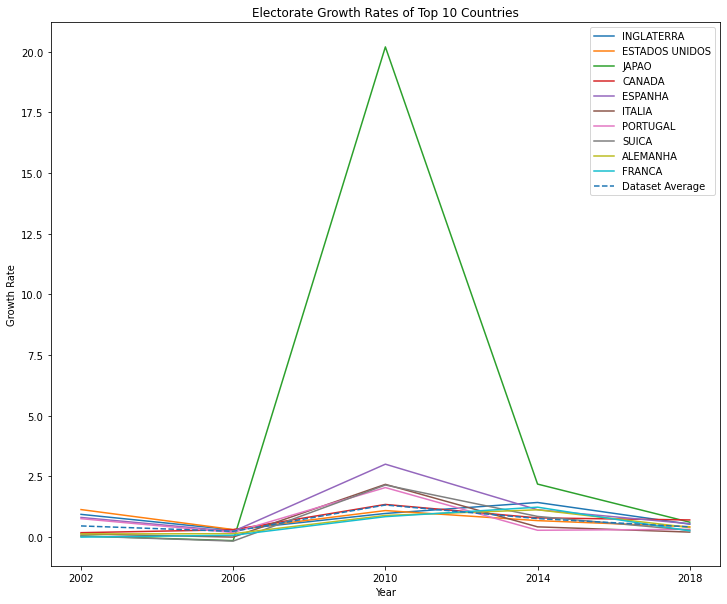

In [35]:
plot_top_10_populations_growth(top_10, df_combined)

In [36]:
top_10_countries_growth_rate = calculate_country_growth(countries_2018.head(10))
top_10_countries_growth_rate

election_year                        1998      2002      2006       2010  \
municipality_code municipality_name                                        
11266             ESTADOS UNIDOS      0.0  1.131863  0.308900   1.090764   
11380             JAPAO               0.0  0.046400 -0.146789  20.195341   
11509             PORTUGAL            0.0  0.757104  0.186441   2.038270   
98841             INGLATERRA          0.0  0.934752  0.297654   0.972034   
11363             ITALIA              0.0  0.128088 -0.000851   2.171526   
11100             ALEMANHA            0.0  0.129519  0.137853   0.889922   
98906             CANADA              0.0  0.180189  0.301561   1.343163   
11240             ESPANHA             0.0  0.807365  0.234326   3.002540   
11525             SUICA               0.0  0.042819 -0.166456   2.143615   
11282             FRANCA              0.0 -0.003488  0.072500   0.840093   

election_year                            2014      2018  
municipality_code municipality_name                      
11266             ESTADOS UNIDOS     0.676905  0.425409  
11380             JAPAO              2.182379  0.612944  
11509             PORTUGAL           0.279441  0.318881  
98841             INGLATERRA         1.424581  0.531195  
11363             ITALIA             0.420385  0.203609  
11100             ALEMANHA           1.122700  0.395075  
98906             CANADA             0.789794  0.704528  
11240             ESPANHA            1.125476  0.549519  
11525             SUICA              0.850169  0.281386  
11282             FRANCA             1.231315  0.254343

## Gender Ratios in Top 10 Countries
Here, we look at the gender ratios in the top 10 countries over all datasets. A few patterns emerge:
* The Brazilian Immigrant populations in Germany,Italy, and Switzerland are predominately female, with women making up ~70% or more of the Brazilian Immigrant population over all datasets.
* Japan is the only country among the top 10 for which men consistently outnumber women within the Brazilian Immigrant population

In [37]:
def calculate_gender_ratio(df_orig):
    '''
    Calculates the % males and % females for each country within a given year
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing a column indicating the % males and % females for each country by year
    '''
    
    df = df_orig.copy() #Create a copy of the dataframe
    
    #Calculate Total Numbers of Voters for each year and location
    total_voters = pd.DataFrame(df.groupby(["election_year", "municipality_code"]).quantity_of_voters.sum().reset_index())
    
    #Combine all voters by municipality code, country name, gender description, and year
    df = pd.DataFrame(df.groupby(["municipality_code", "municipality_name", "gender_description", "election_year", ]).quantity_of_voters.sum().reset_index())
    
    #Create a temporary Ratios column to hold the gender ratuis
    ratios = pd.DataFrame(0.0, index=np.arange(len(df)), columns=['ratios'])
    
    
    #Iterate through dataframe and calculate % for each gender 
    for row_idx in df.index:
        code = df.at[row_idx, 'municipality_code']
        year = df.at[row_idx, 'election_year']
        voters = df.at[row_idx, 'quantity_of_voters']
        num_voters_total = total_voters[(total_voters.municipality_code == code) & (total_voters.election_year == year)].quantity_of_voters.values[0]
        ratios.at[row_idx, 'ratios'] = voters/num_voters_total
        
    

    #Add Ratios to Dataframe
    df['ratios'] = ratios['ratios']
    
    #Clean Up NA
    df = df.fillna(0.0)
    
    
    return df

In [38]:
top_10_countries_gender_ratios = calculate_gender_ratio(top_10)
top_10_countries_gender_ratios_by_year =top_10_countries_gender_ratios.groupby(["municipality_name", "gender_description", "election_year", ]).ratios.mean().unstack()
top_10_countries_gender_ratios_by_year

election_year                             1998      2002      2006      2010  \
municipality_name gender_description                                           
ALEMANHA          FEMININO            0.711358  0.742692  0.733998  0.712879   
                  MASCULINO           0.288642  0.257308  0.266002  0.287121   
CANADA            FEMININO            0.528123  0.537326  0.543422  0.552067   
                  MASCULINO           0.471877  0.462674  0.456578  0.447933   
ESPANHA           FEMININO            0.600567  0.614420  0.652063  0.659898   
                  MASCULINO           0.399433  0.385580  0.347937  0.340102   
ESTADOS UNIDOS    FEMININO            0.544187  0.563019  0.574195  0.574768   
                  MASCULINO           0.455813  0.436981  0.425805  0.425232   
FRANCA            FEMININO            0.649228  0.668500  0.683450  0.678490   
                  MASCULINO           0.350772  0.331500  0.316550  0.321510   
INGLATERRA        FEMININO            0.577305  0.581745  0.597175  0.593898   
                  MASCULINO           0.422695  0.418255  0.402825  0.406102   
ITALIA            FEMININO            0.702087  0.738252  0.761651  0.739918   
                  MASCULINO           0.297913  0.261748  0.238349  0.260082   
JAPAO             FEMININO            0.460800  0.469419  0.467742  0.478228   
                  MASCULINO           0.539200  0.530581  0.532258  0.521772   
PORTUGAL          FEMININO            0.494809  0.511429  0.552687  0.576395   
                  MASCULINO           0.505191  0.488571  0.447313  0.423605   
SUICA             FEMININO            0.751647  0.778901  0.730580  0.746625   
                  MASCULINO           0.248353  0.221099  0.269420  0.253375   

election_year                             2014      2018  
municipality_name gender_description                      
ALEMANHA          FEMININO            0.710374  0.690213  
                  MASCULINO           0.289626  0.309787  
CANADA            FEMININO            0.556019  0.543155  
                  MASCULINO           0.443981  0.456845  
ESPANHA           FEMININO            0.665050  0.656247  
                  MASCULINO           0.334950  0.343753  
ESTADOS UNIDOS    FEMININO            0.575117  0.568363  
                  MASCULINO           0.424883  0.431637  
FRANCA            FEMININO            0.653571  0.652304  
                  MASCULINO           0.346429  0.347696  
INGLATERRA        FEMININO            0.588739  0.579427  
                  MASCULINO           0.411261  0.420573  
ITALIA            FEMININO            0.745229  0.744289  
                  MASCULINO           0.254771  0.255711  
JAPAO             FEMININO            0.457729  0.447635  
                  MASCULINO           0.542271  0.552365  
PORTUGAL          FEMININO            0.599730  0.612276  
                  MASCULINO           0.400270  0.387724  
SUICA             FEMININO            0.728647  0.712426  
                  MASCULINO           0.271353  0.287574

In [39]:
def plot_gender_ratio_by_country(df, df_combined):
    '''
    Plots the gender ratios for the top 10 countries (as well as the aggregate dataset) by year
    :param df -- Electorate data in the top 10 countries
    :param df_combined - Electorare Data on the entire dataset
    '''
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
    
    countries = df["municipality_name"].unique()
    
    #Get Total Voters and years for aggregate dataset
    years = df_combined.election_year.unique()
    
    #Plot data for top 10 countries - ratio of women voters
    for country in countries:
        df_country = df[df["municipality_name"] == country]
        df_country_female = df_country[df_country["gender_description"] == "FEMININO"]
        axes[0].plot(df_country_female["election_year"], df_country_female["ratios"], label = str(country))
    
    #Plot data for overall electorate -- ratio of women voters
    total_ratios = [0 for year in years]
    for index, year in enumerate(years):
        total_voters = df_combined[df_combined["election_year"] == year].quantity_of_voters.sum()
        total_women = df_combined[(df_combined["gender_description"] == "FEMININO") & (df_combined["election_year"] == year)].quantity_of_voters.sum()
        total_ratios[index] = total_women/total_voters
    
    axes[0].plot(years, total_ratios, '--', label="All Countries")
                                   
        
    axes[0].set_xticks(years)
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("% Women in the Electorate")
    axes[0].legend(loc="best")
    axes[0].set_ylim(0, 1)
    axes[0].set_title("Ratio of Women in the Electorate by Year")
    
    #Plot data for top 10 countries - ratio of male voters
    for country in countries: 
        df_country = df[df["municipality_name"] == country]
        df_country_male = df_country[df_country["gender_description"] == "MASCULINO"]
        axes[1].plot(df_country_male["election_year"], df_country_male["ratios"], label = str(country))
        
    #Plot data for overall electorate -- ratio of male voters
    total_ratios = [0 for year in years]
    for index, year in enumerate(years):
        total_voters = df_combined[df_combined["election_year"] == year].quantity_of_voters.sum()
        total_men = df_combined[(df_combined["gender_description"] == "MASCULINO") & (df_combined["election_year"] == year)].quantity_of_voters.sum()
        total_ratios[index] = total_men/total_voters
    
    axes[1].plot(years, total_ratios, '--', label="All Countries")
            
    axes[1].set_xticks(years)
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("% Men in the Electorate")
    axes[1].legend(loc="best")
    axes[1].set_ylim(0, 1)
    axes[1].set_title("Ratio of Men in the Electorate by Year")
    plt.tight_layout()
#     plt.savefig("../readme_images/top10_gender_ratios.png", facecolor='w')

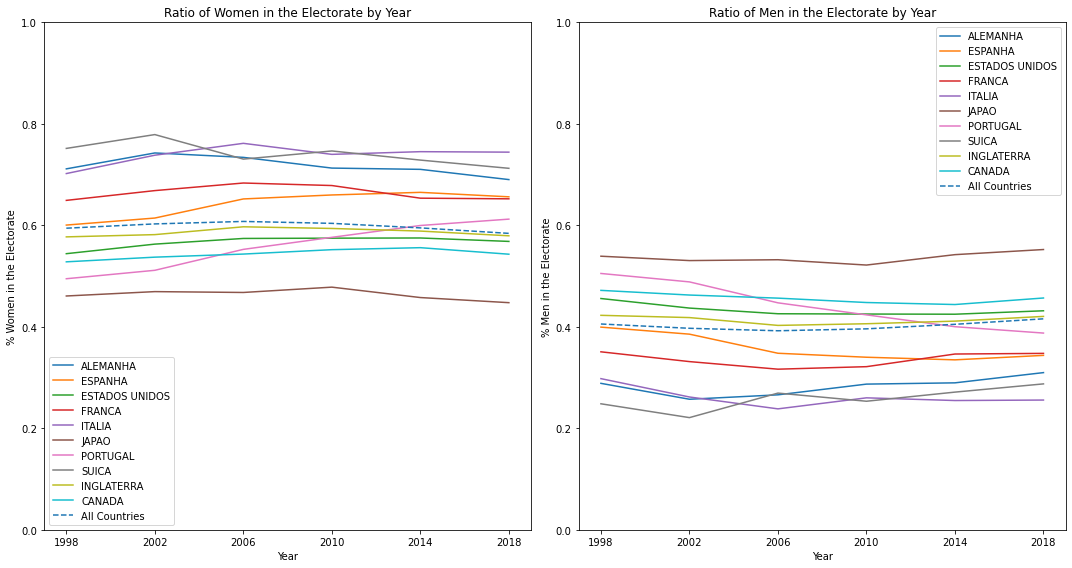

In [40]:
plot_gender_ratio_by_country(top_10_countries_gender_ratios, df_combined)

Looking at the graphs above, you can see that for the majority of the top ten countries, women make up the majority of the Brazillian electorate. This trend has not changed much in the period between 1998 - 2018. There doesn't appear to be a trend upward, or downward 

If we compare these top 10 countries to the overall dataset (where the gender ratio has remained relatively constant at 60% women and 40% men), we can see that the proportion of women voters is higher in Switzerland, Italy, Germany, France, and Spain that the dataset average (acorss all years). Meanwhile, in Japan, Canada, the US, and England, the proportion of male voters has remained higher than the dataset average across all years. Portugal is the one exception in our dataset where the voting population has shifted from having more male voters to more female voters (in comparison to the dataset average) over the years analyzed.

## Educational Attainment in Top 10 Countries

In [44]:
def plot_education_by_country(df, df_combined, education_level, gender = None):
    '''
    Plots the ratio for each educational_attainment level for the top 10 countries (as well as the overall dataset average)
    :param df - A pandas dataframe with the information on the top 10 countries
    :param df_combined - A pandas dataframe with information on the entire electorate
    :param education level - The education level description
    :param gender - The gender description (MASCULINO/FEMININO) or None to display both genders
    
    '''
    
    countries = df["municipality_name"].unique()
    years = df["election_year"].unique()
    years = years[:-1]
    
    if gender is not None:
        df = df[df["gender_description"] == gender]
        df_combined = df_combined[df_combined["gender_description"] == gender]
        
    
    for country in countries:
        df_country = df[df["municipality_name"] == country]
        sum_educations = []
        for year in years:
            df_year = df_country[df_country["election_year"] == year]
            sum_all = df_year["quantity_of_voters"].sum()
            df_year = df_year[df_year["educational_attainment_description"] == education_level]
            sum_education = df_year["quantity_of_voters"].sum()
            ratio_education = sum_education / sum_all
            sum_educations.append(ratio_education)
        
        plt.plot(years, sum_educations, label = str(country))
    
    #Add trend line for entire dataset
    total_ratios = [0 for year in years]
    for index, year in enumerate(years):
        total_voters = df_combined[df_combined["election_year"] == year].quantity_of_voters.sum()
        total_edu = df_combined[(df_combined["educational_attainment_description"] == education_level) & (df_combined["election_year"] == year)].quantity_of_voters.sum()
        total_ratios[index] = total_edu/total_voters
    
    plt.plot(years, total_ratios, '--', label="All Countries")
    
   
    plt.xticks(years)
    plt.xlabel("Year")
    plt.ylabel("Ratio of voters with the education attainment: " + str(education_level))
    plt.legend(loc="upper left")
    
    #Appendix to add to filename when save image
    fname_app = ''
    
    if gender is not None:
        plt.title("Ratio of voters with the educational attainment: " + str(education_level) + " by Year: " + gender)
        fname_app  = '_'+str(gender)
        
    else:
        plt.title("Ratio of voters with the educational attainment: " + str(education_level) + " by Year")
        fname_app = '_all_genders'
    
    fname_app = education_level.replace(" ", "_") + fname_app
#     plt.savefig("../readme_images/top_10_edu_{}.png".format(fname_app), facecolor='w')
    plt.show()
    
    
def plot_education_ratios(df):
    '''
    Plots the ratio (as % of total electorate in top 10) for educational attainment description for all top_10 countries combined across all years
    :param df - A pandas dataframe with the information on the top 10 countries
    
    '''
        
    educations = df["educational_attainment_description"].unique()
    years = df["election_year"].unique()
    years = years[:-1]
    educations = educations[:-1]
    
   
    
    for education in educations:
        sum_educations = []
        for year in years:
            df_year = df[df["election_year"] == year]
            sum_all = df_year["quantity_of_voters"].sum()
            df_year = df_year[df_year["educational_attainment_description"] == education]
            sum_education = df_year["quantity_of_voters"].sum()
            ratio_education = sum_education / sum_all
            sum_educations.append(ratio_education)
        
        plt.plot(years, sum_educations, label = str(education))
    
   
    plt.xticks(years)
    plt.xlabel("Year")
    plt.ylabel("Ratio of voters with the education attainment")
    plt.legend(loc="upper left")
    plt.title("Ratio of voters with the educational attainment by Year (Aggregate Top Ten Countries)")
    plt.ylim(0,.5)
#     plt.savefig("../readme_images/top_10_edu_all_levels.png", facecolor='w')
    plt.show()
    

### Educational Attainment by Year
The plot below shows the overall educational attainment trends. Analysis is included at the end of the section.

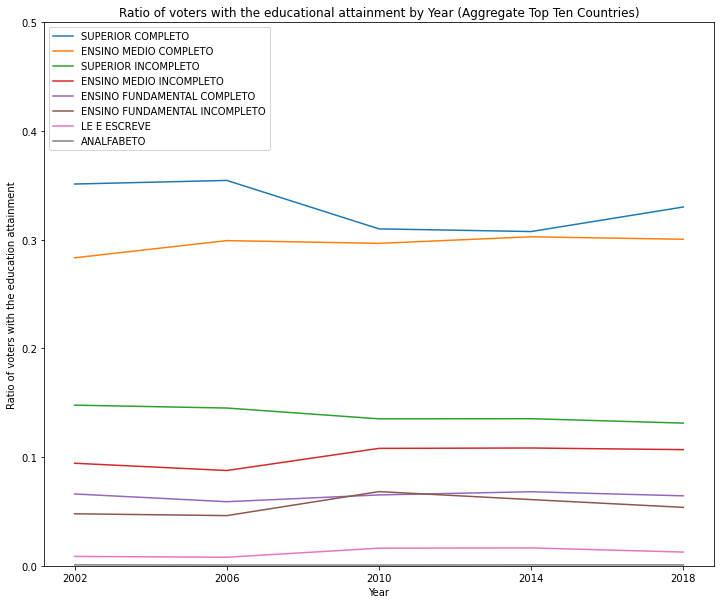

In [53]:
plot_education_ratios(top_10)

When looking at the general trends over all years, we see that the ratio of voters who have a completed college education has actually dropped, especially from 2006 to 2010. The numbers went up again from 2014 to 2018, but they did not return to pre 2006 levels. Likewise, the ratios of voters who have not finished high school or elementary school actaully increased from 2006 to 2010, before dropping a little from 2014 to 2018. The other educational attainments have remained relatively stable. Once again, we cannot interpret trends for literate and illiterate voters because the numbers are too insignificant.

### Country-level Trends for Educational Attainment by Year
The plots below show details at the country-level (within the top 10) for each educational attainment level. 

Looking at the graphs below, in the the majority of the countries we see an upward trend in the ratio of high school educated and incompletely high School educated voters beginning in 2006. There seems to be a downward trend the ratio of voters who have completed or have not completed college in beginning in 2006, which is likely just due to the ratio for high school education level ratios increasing. In 2010 we see a peak for voters with complete or incomplete elementary education, then a trend downards. We cannot interpret a trends for literate and illiterate voter ratios as their ratios are inconsequentially small.

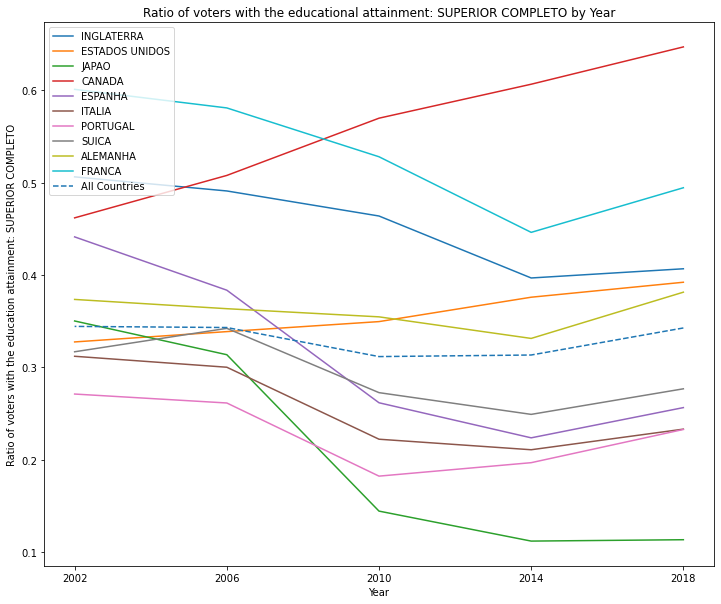

In [62]:
plot_education_by_country(top_10, df_combined, "SUPERIOR COMPLETO")

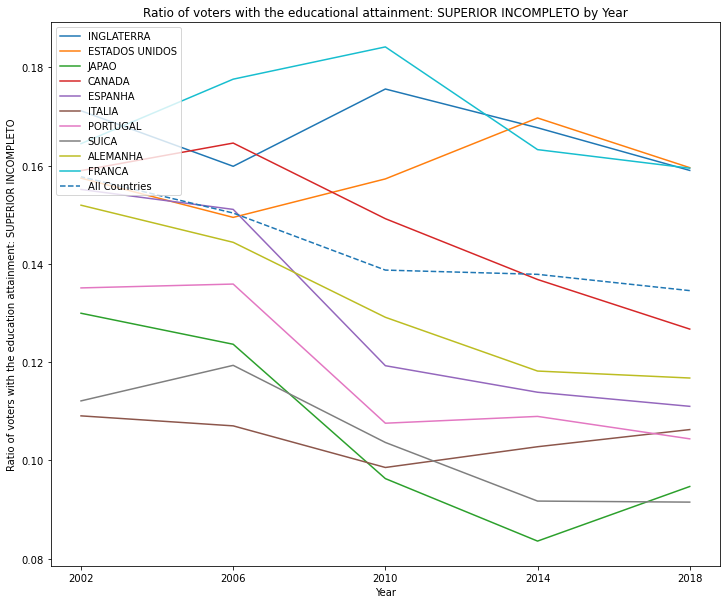

In [63]:
plot_education_by_country(top_10, df_combined, "SUPERIOR INCOMPLETO")

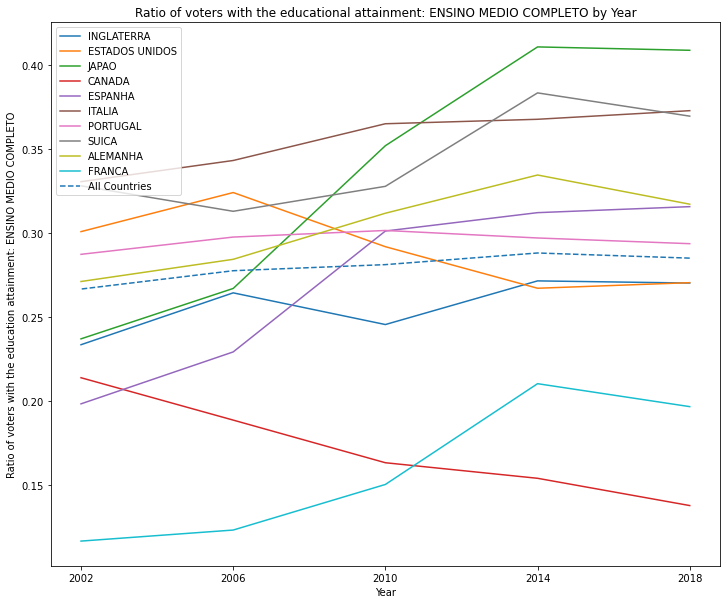

In [64]:
plot_education_by_country(top_10, df_combined, "ENSINO MEDIO COMPLETO")

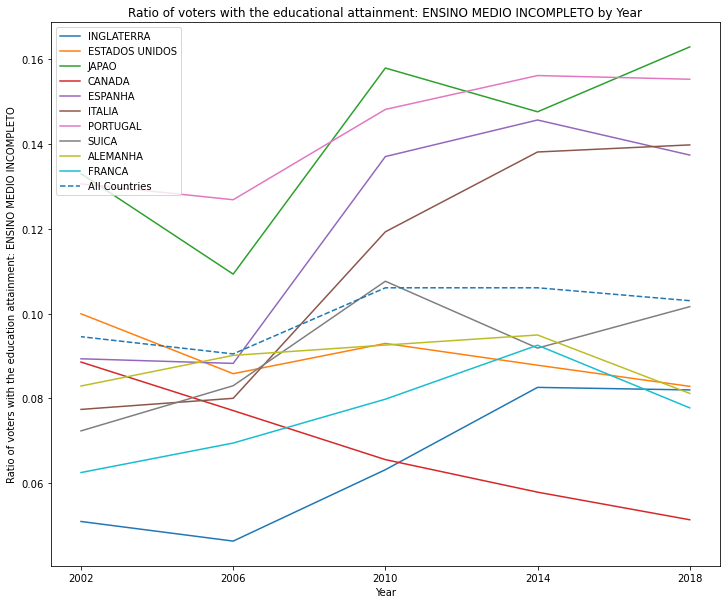

In [65]:
plot_education_by_country(top_10, df_combined, "ENSINO MEDIO INCOMPLETO")

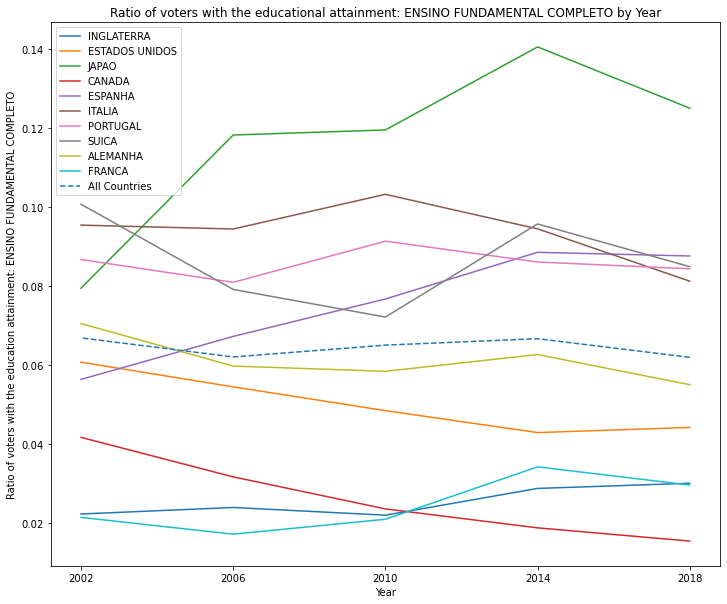

In [66]:
plot_education_by_country(top_10, df_combined, "ENSINO FUNDAMENTAL COMPLETO")

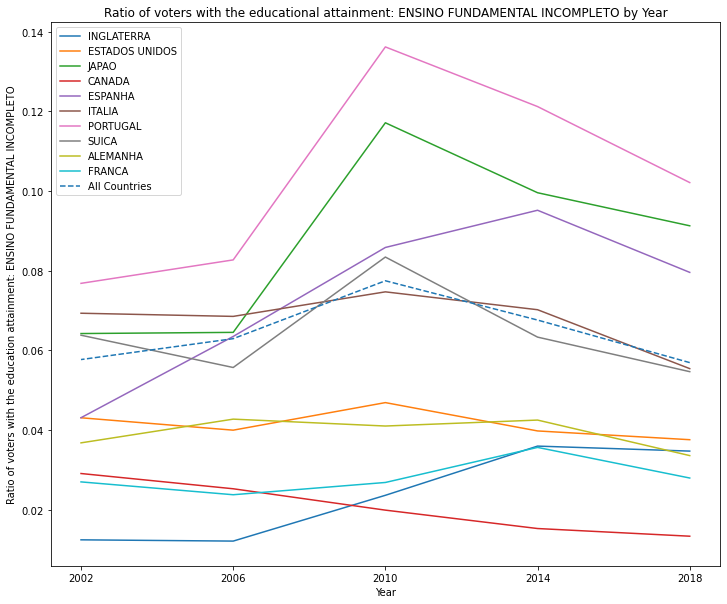

In [67]:
plot_education_by_country(top_10, df_combined, "ENSINO FUNDAMENTAL INCOMPLETO")

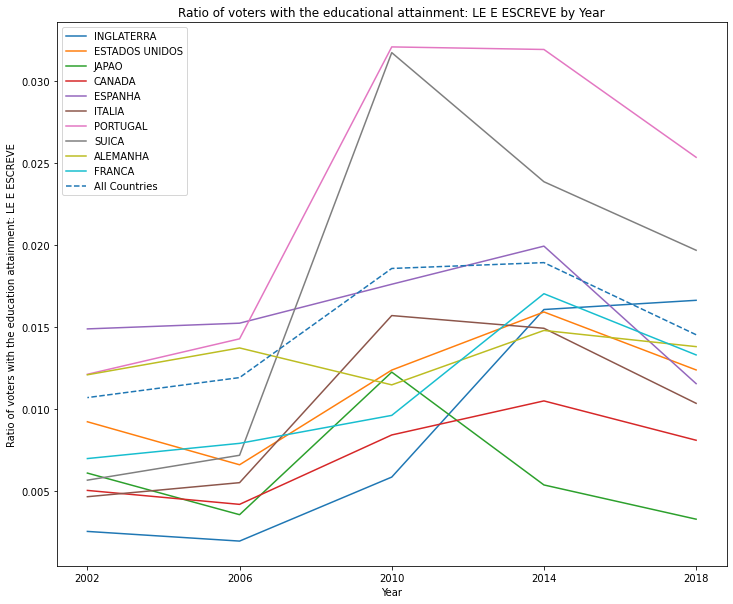

In [68]:
plot_education_by_country(top_10, df_combined, "LE E ESCREVE")

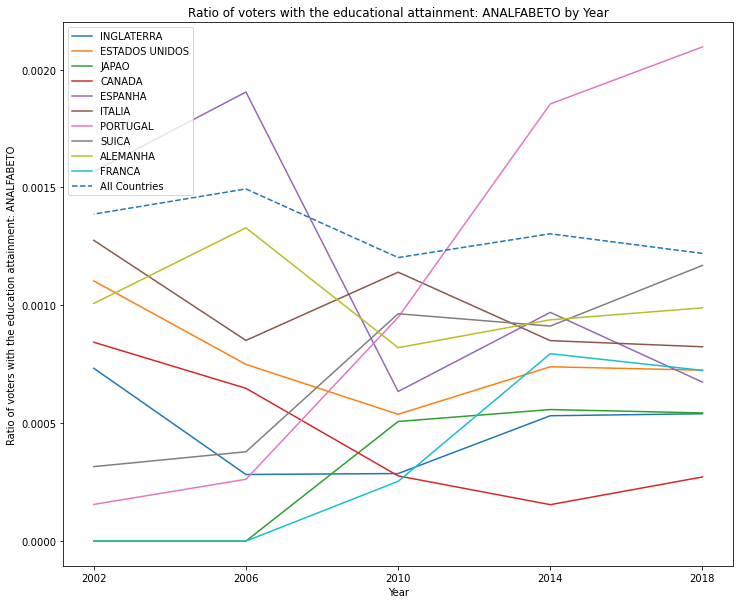

In [69]:
plot_education_by_country(top_10, df_combined, "ANALFABETO")

## Educational Attainment for Top 10 Countries by Gender and Year
The plots below show educational trends in the top 10 countries for men and women by year. Note that we didn't incorporate graphs for illiterate and literate voters because their numbers are inconsequentially small.

For most countries except for the United States and Canada, where the ratios increased, the ratios of college educated men and women both went down. Similar but opposite patterns appear for high school education, where the ratios of high school educated men and women both increased, except for in the US and Canada, where they decreased. For incomplete college education, the trend is universally downwards for men. For women, the trends are similar except for in the US where the numbers of incompletely college educated men increased. For incomplete high school education, the trends for both men and women are going up as a whole, but significant increases occured in the countries of Japan and Spain. Similarly, the exceptions to this were once again Canada and the US.

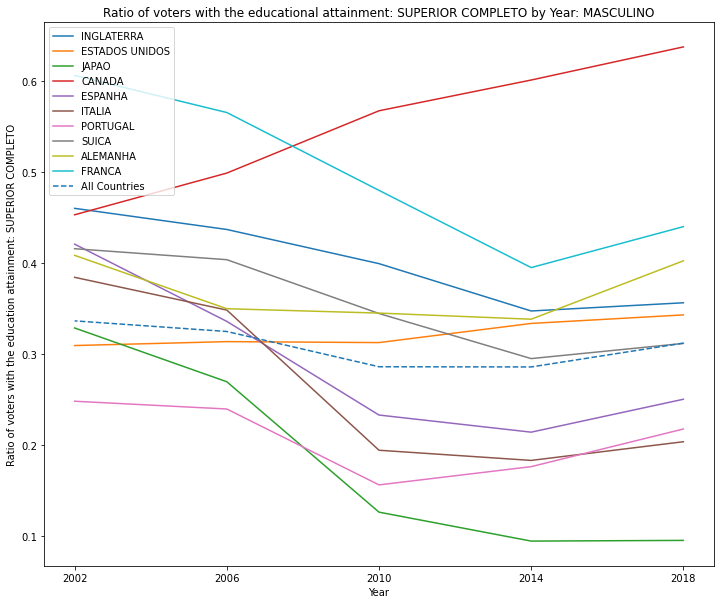

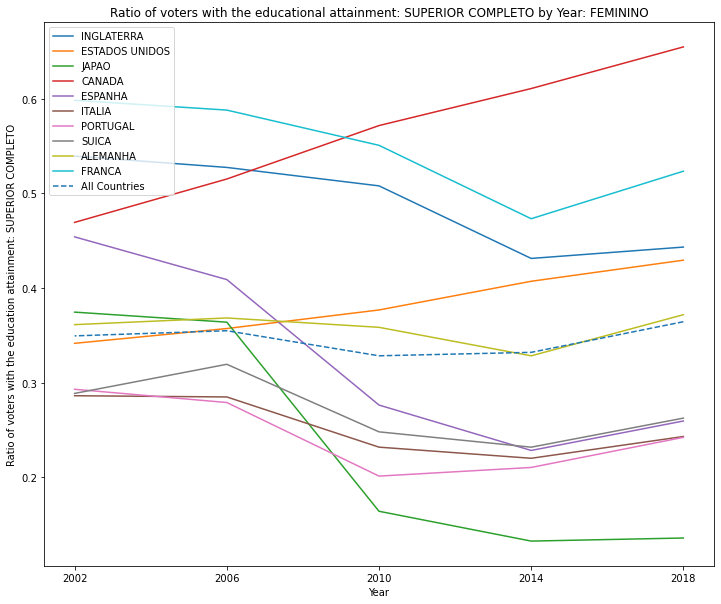

In [74]:
plot_education_by_country(top_10, df_combined, "SUPERIOR COMPLETO", "MASCULINO")
plot_education_by_country(top_10, df_combined, "SUPERIOR COMPLETO", "FEMININO")

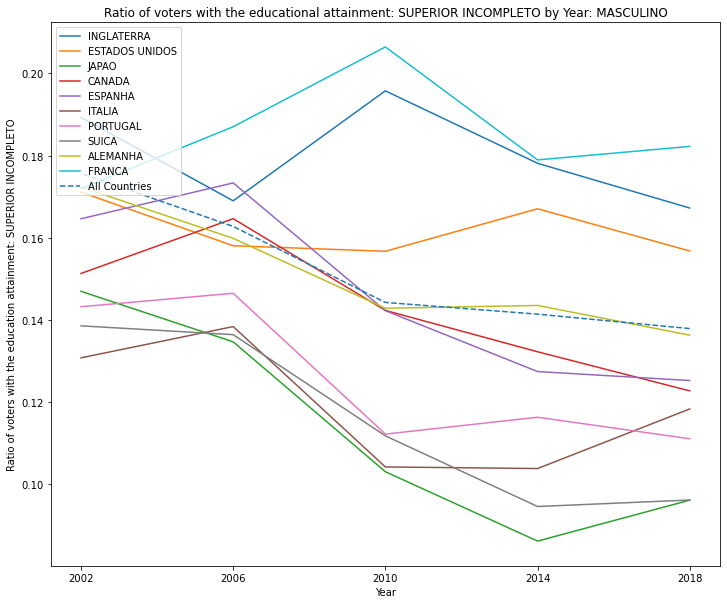

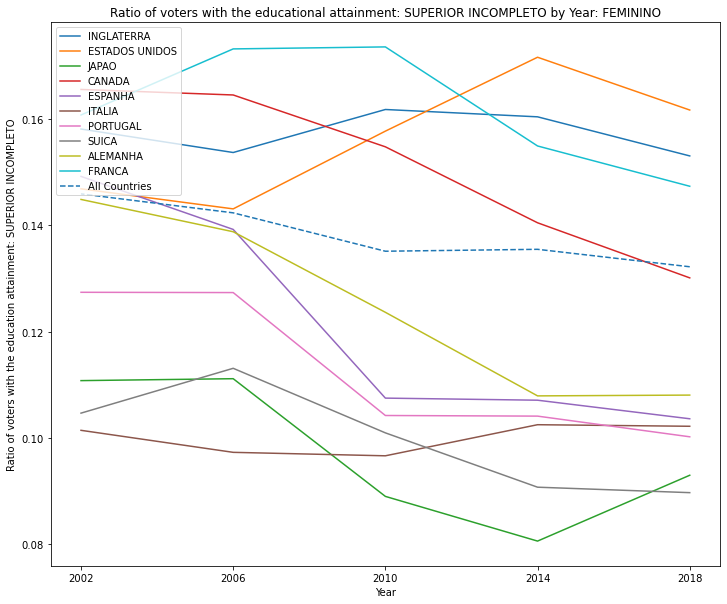

In [75]:
plot_education_by_country(top_10, df_combined, "SUPERIOR INCOMPLETO", "MASCULINO")

plot_education_by_country(top_10, df_combined, "SUPERIOR INCOMPLETO", "FEMININO")

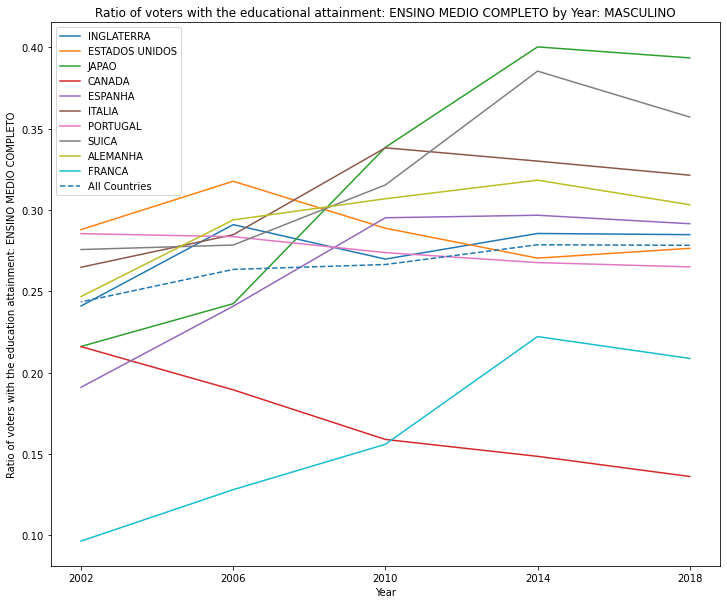

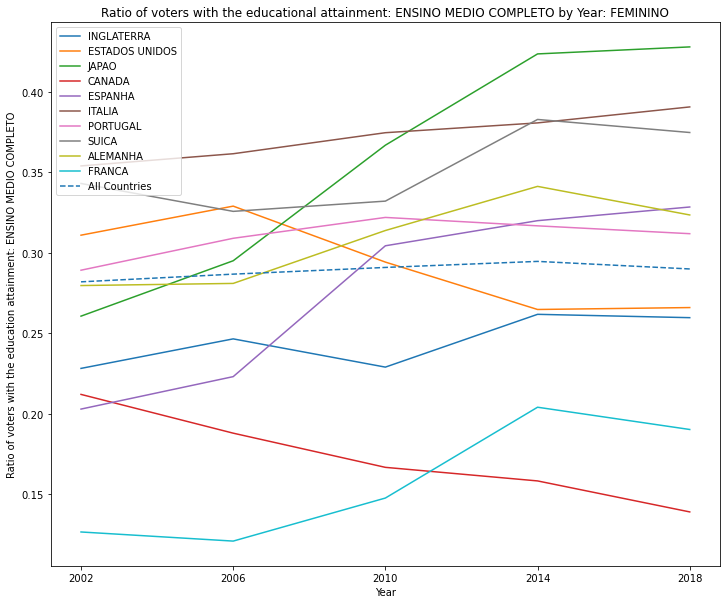

In [76]:
plot_education_by_country(top_10, df_combined, "ENSINO MEDIO COMPLETO", "MASCULINO")

plot_education_by_country(top_10, df_combined, "ENSINO MEDIO COMPLETO", "FEMININO")

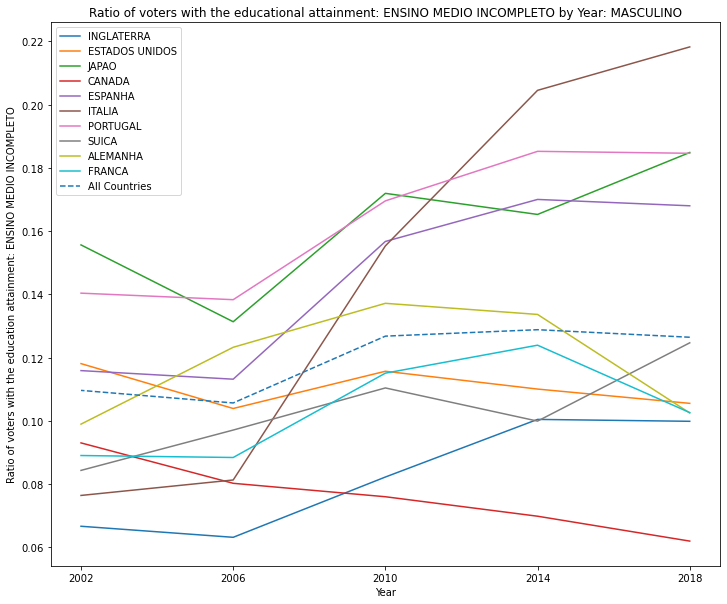

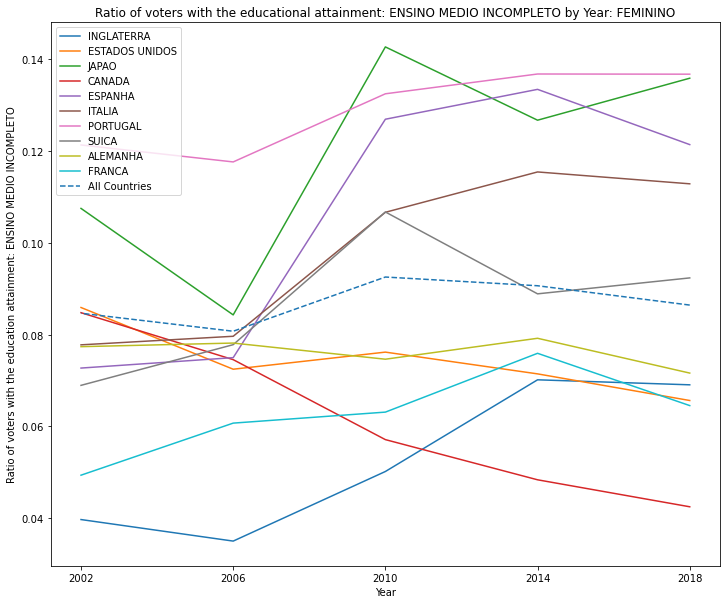

In [73]:
plot_education_by_country(top_10, df_combined, "ENSINO MEDIO INCOMPLETO", "MASCULINO")

plot_education_by_country(top_10, df_combined, "ENSINO MEDIO INCOMPLETO", "FEMININO")

## Age Analysis of Top 10 Countries

In [77]:
import matplotlib.pyplot as plt

def plot_age_by_country(df, df_combined, age, gender = None):
    '''
    Plots the ratio of age groups for the top 10 countries (as well as the overall dataset average)
    :param df - A pandas dataframe with the information on the top 10 countries
    :param df_combined - A pandas dataframe with information on the entire electorate
    :param age - The age group description
    :param gender - The gender description (MASCULINO/FEMININO) or None to display both genders
    
    '''
    
    countries = df["municipality_name"].unique()
    years = df["election_year"].unique()
    
    if gender is not None:
        df = df[df["gender_description"] == gender]
        df_combined = df_combined[df_combined["gender_description"] == gender]
    
    for country in countries:
        df_country = df[df["municipality_name"] == country]
        sum_ages = []    
        for year in years:
            df_year = df_country[df_country["election_year"] == year]
            sum_all = df_year["quantity_of_voters"].sum()
            df_year = df_year[df_year["age_group_description"] == age]
            sum_age = df_year["quantity_of_voters"].sum()
            ratio_age = sum_age / sum_all
            sum_ages.append(ratio_age)
        
        plt.plot(years, sum_ages, label = str(country))
    
    #Plot data for overall electorate
    total_ratios = [0 for year in years]
    for index, year in enumerate(years):
        total_voters = df_combined[df_combined["election_year"] == year].quantity_of_voters.sum()
        total_age = df_combined[(df_combined["age_group_description"] == age) & (df_combined["election_year"] == year)].quantity_of_voters.sum()
        total_ratios[index] = total_age/total_voters
    
    plt.plot(years, total_ratios, '--', label="All Countries")
    
    
    plt.xticks(years)
    plt.xlabel("Year")
    plt.ylabel("Ratio of voters with the age: " + str(age))
    plt.legend(loc="upper left")
    
    #Appendix to add to filename when save image
    fname_app = ''
    
    if gender is not None:
        plt.title("Ratio of voters with the age: " + str(age) + " by Year: " + gender)
        fname_app  = '_'+str(gender)
        
    else:
        plt.title("Ratio of voters with the age: " + str(age) + " by Year")
        fname_app = '_all_genders'
    
    fname_app = age.replace(" ", "_") + fname_app
#     plt.savefig("../readme_images/top_10_age_{}.png".format(fname_app), facecolor='w')
    
    
    plt.show()
    

def plot_age_ratios(df):
    '''
    Plots the ratios for each age group in the top 10 countries by year
    param: df - The data for the top 10 countries
    '''
    
    #Helper function to eliminate "INVALIDO" entries
    def filter_ages(age):
        age = age.strip().split()
        if age[0].isnumeric() or age[0] == 'SUPERIOR':
            return True
        else:
            return False
    
    #Get Ages
    ages = list(df["age_group_description"].unique())
    ages.remove(np.nan)#remove nans
    ages = [age for age in ages if filter_ages(age)]
    
    years = df["election_year"].unique()
    
   
    #Add Age Group Data 
    for age in ages:
        sum_ages = []
        for year in years:
            df_year = df[df["election_year"] == year]
            sum_all = df_year["quantity_of_voters"].sum()
            df_year = df_year[df_year["age_group_description"] == age]
            sum_age = df_year["quantity_of_voters"].sum()
            ratio_age = sum_age / sum_all
            sum_ages.append(ratio_age)
        
        plt.plot(years, sum_ages, label = str(age))
    
   
    plt.xticks(years)
    plt.xlabel("Year")
    plt.ylabel("Ratio of voters in the Age Group")
    plt.legend(loc="best")
    plt.title("Ratio of voters each Age Group by year by Year (Aggregate Top Ten Countries)")
    plt.ylim(0,.8)
#     plt.savefig("../readme_images/top_10_all_ages.png", facecolor='w')
    plt.show()

### Age Group Distribution in Top 10
Below, we plot the overall age group distrubution in the top 10 countries. From this plot, we can see that the majority of the populations in these countries fall into an age range of 25-59, with all other age groups combined comprising less than 25% of the overall population

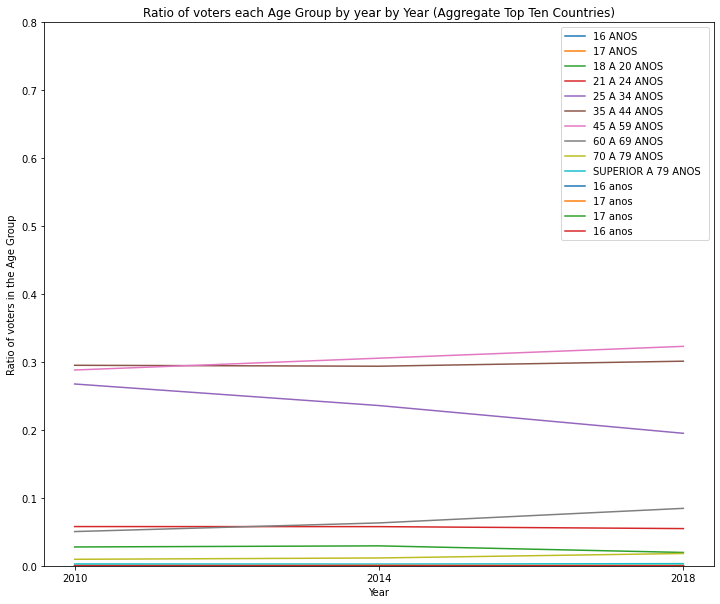

In [78]:
combined_for_age = combine_data(df_2010, df_2014, df_2018)
top_10_for_age = get_top_N(combined_for_age, countries_2018, 10)
plot_age_ratios(top_10_for_age)

### Analysis of Age Group Categories
Next, we look at each of the age group categories to analyze how they have changed by country over the years 2010-2018

Overall, the percentage of voters within certain age windows increases the older the age window gets, eventually reaching a peak of nearly 40% in the age window 35-44. There were some other interesting trends as well, such as how the 18-20 and 25-34 age groups both saw major declines between 2010 and 2018. For example, the peak percentage of voters aged 25 to 34 in 2010 was in Spain, with 3.5% of all voters in that age window. However, by 2018, that had dropped to 2.75% with France as the highest percentage. The same trend can be seen universally among all of the top 10 countries between the years 2014 and 2018 in the age group 18-20.

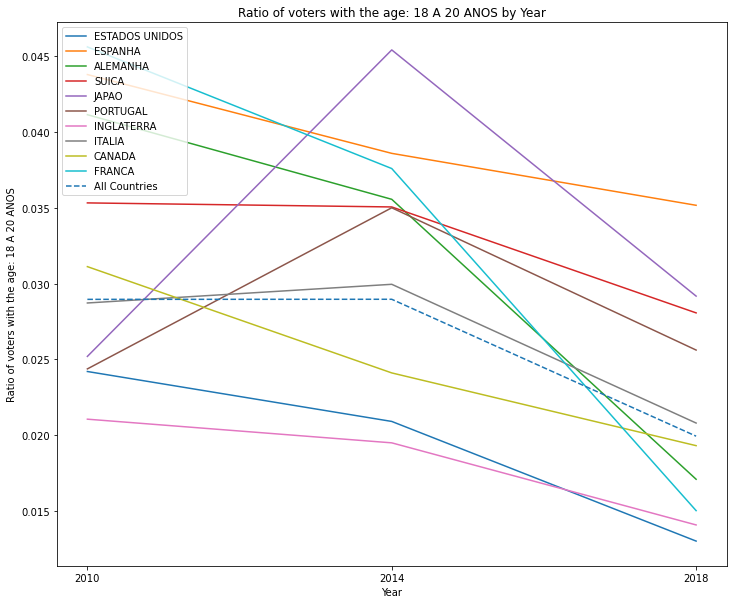

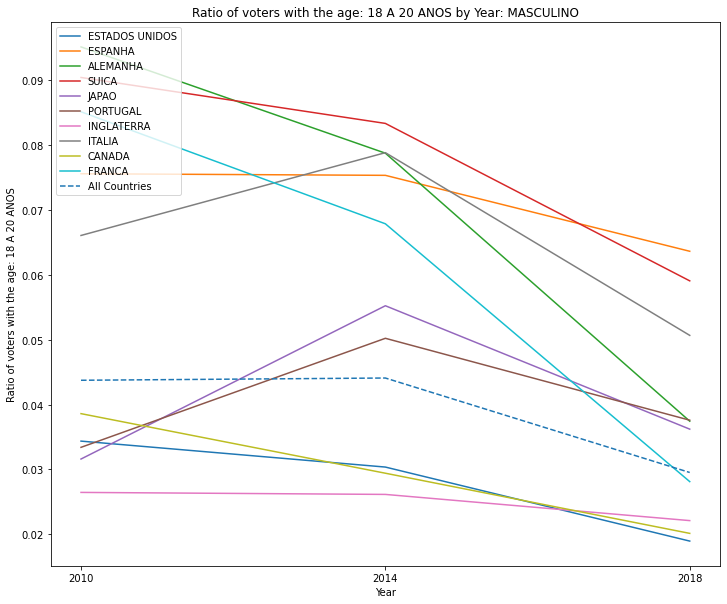

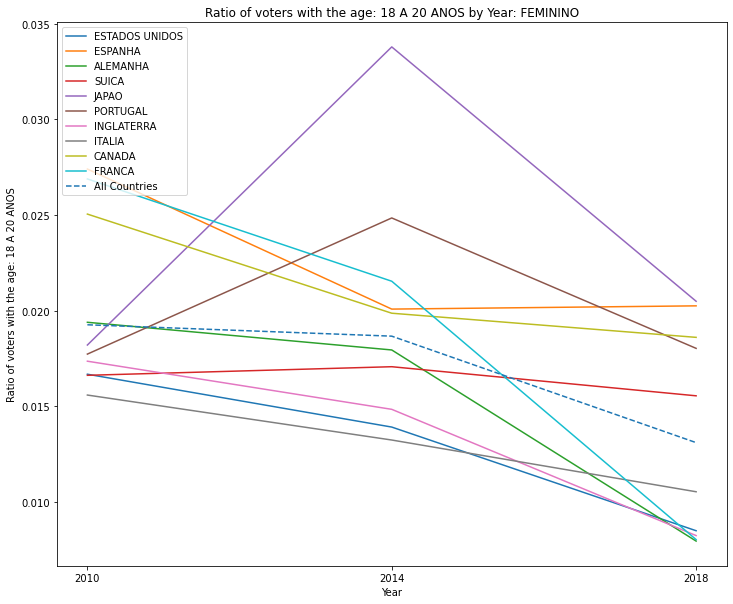

In [79]:
plot_age_by_country(top_10_for_age, df_combined, "18 A 20 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "18 A 20 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "18 A 20 ANOS", "FEMININO")

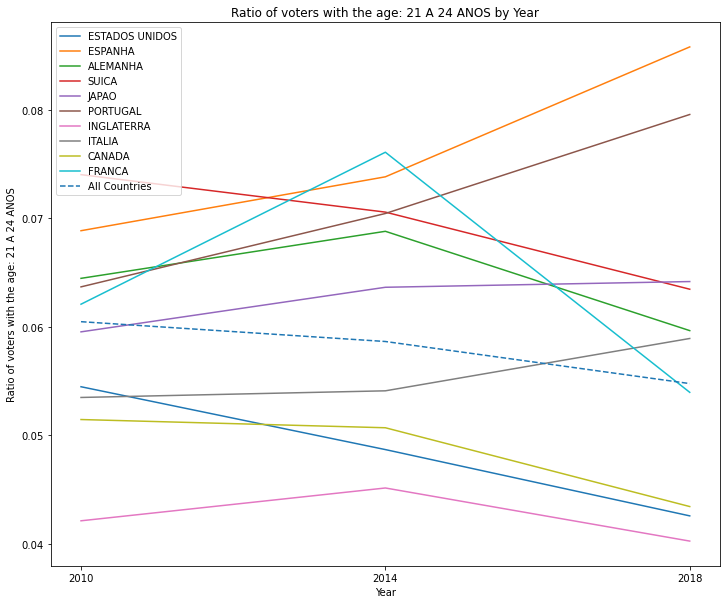

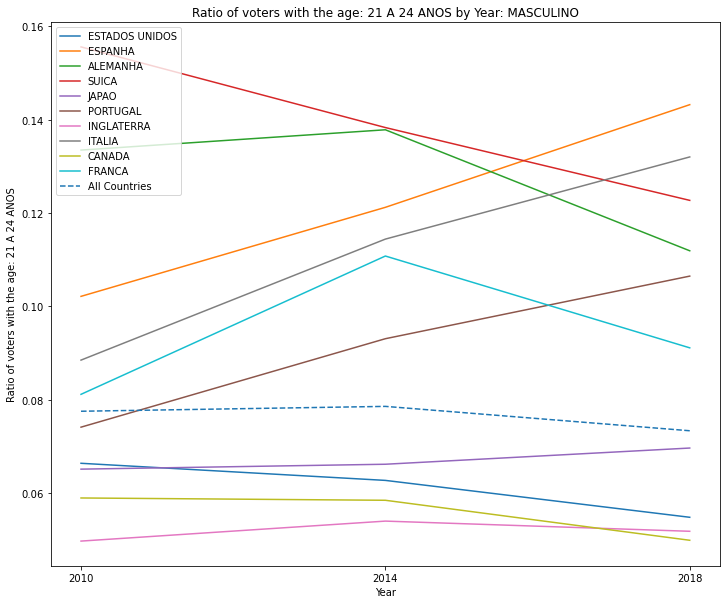

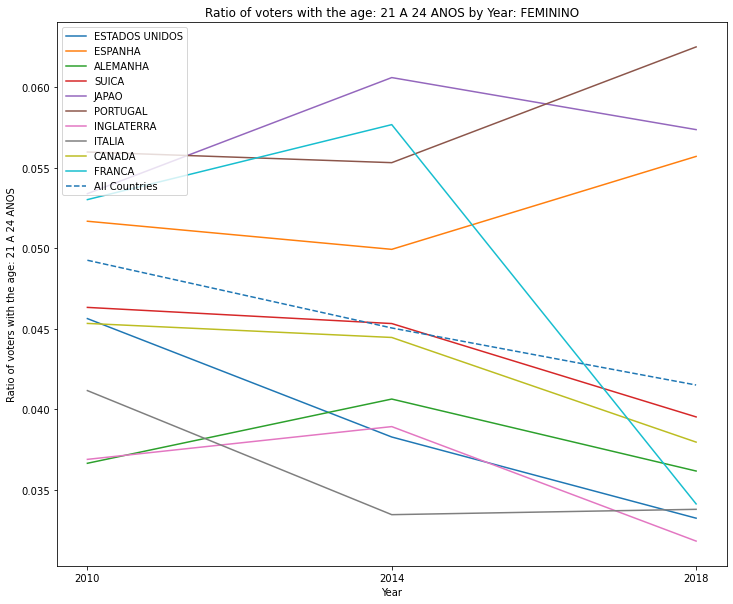

In [80]:
plot_age_by_country(top_10_for_age, df_combined, "21 A 24 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "21 A 24 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "21 A 24 ANOS", "FEMININO")

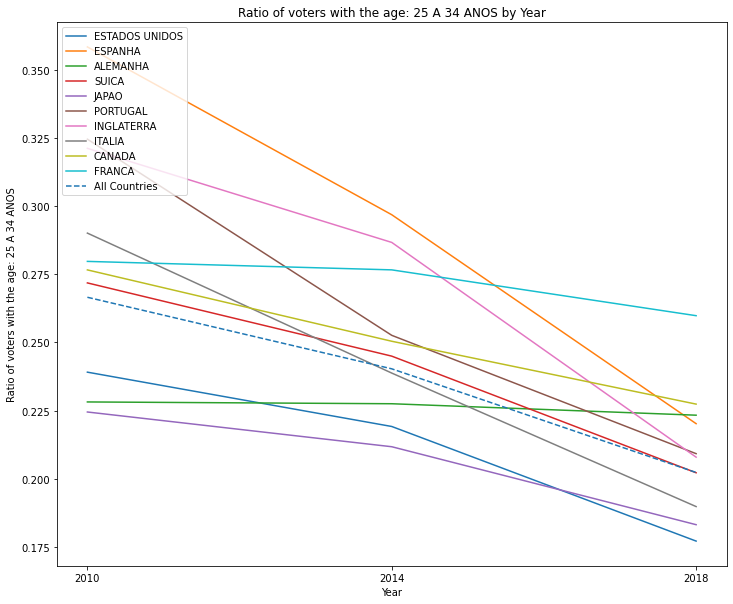

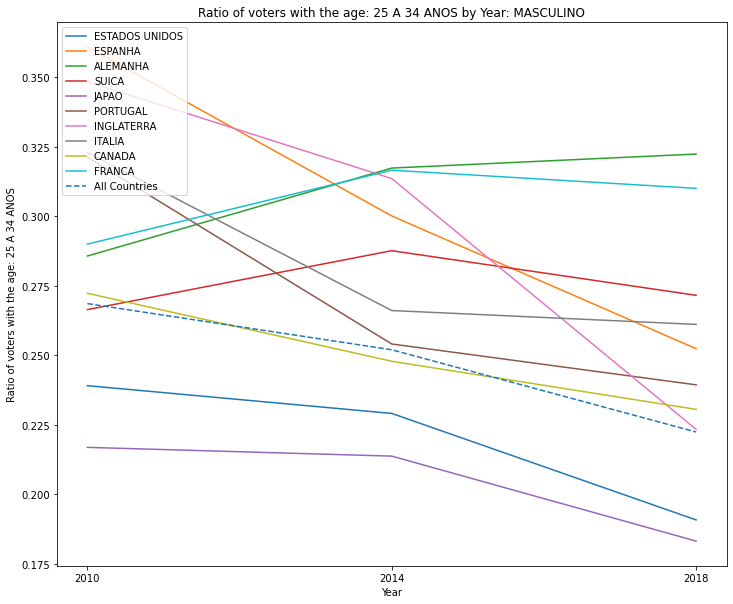

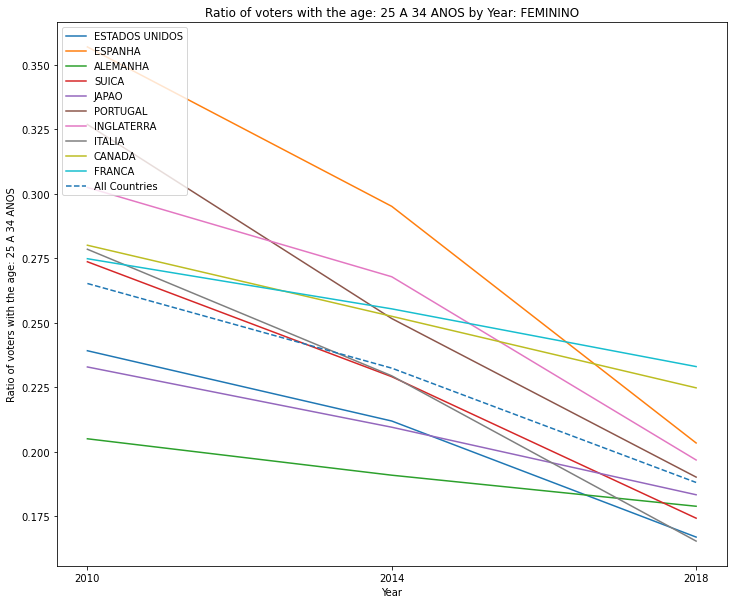

In [81]:
plot_age_by_country(top_10_for_age, df_combined, "25 A 34 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "25 A 34 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "25 A 34 ANOS", "FEMININO")

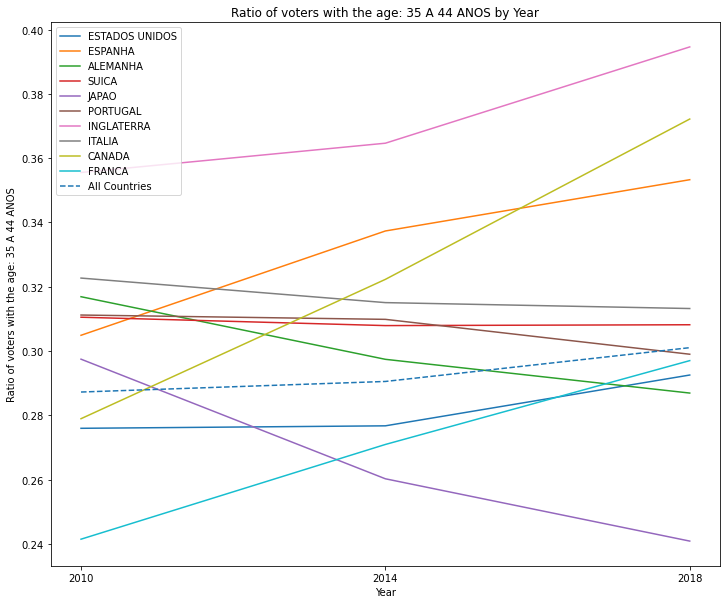

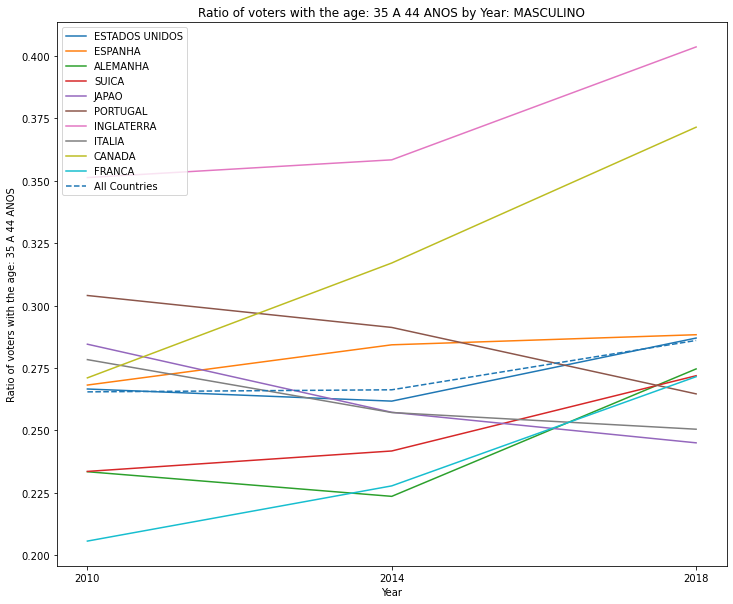

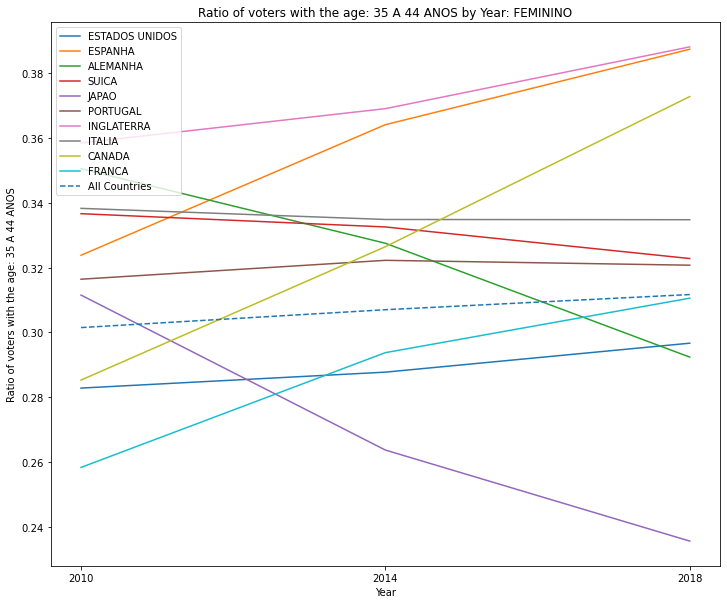

In [82]:
plot_age_by_country(top_10_for_age, df_combined, "35 A 44 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "35 A 44 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "35 A 44 ANOS", "FEMININO")

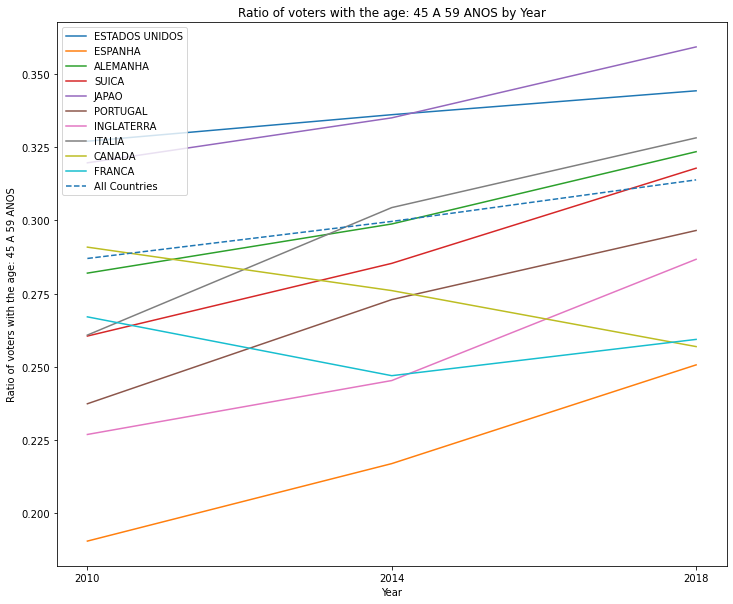

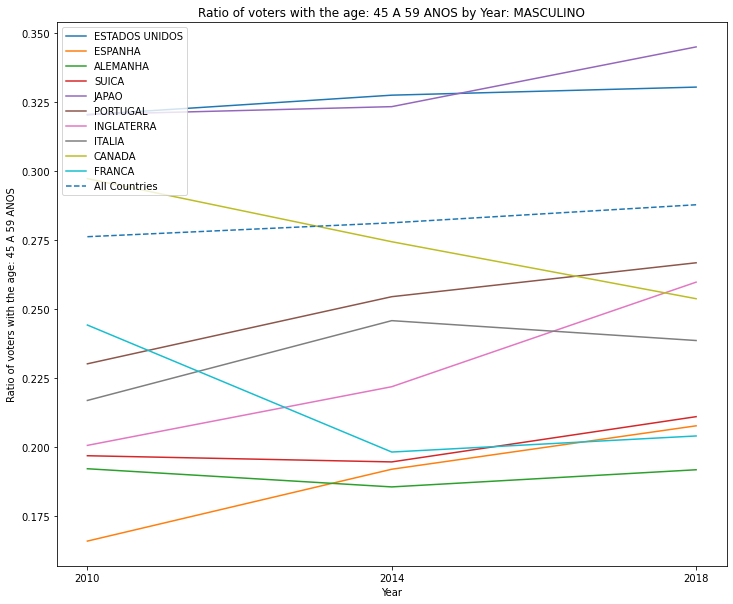

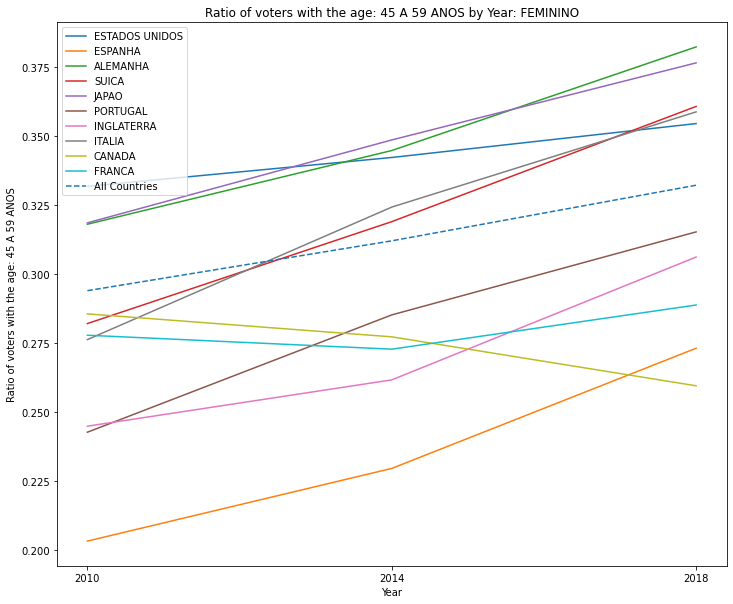

In [83]:
plot_age_by_country(top_10_for_age, df_combined, "45 A 59 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "45 A 59 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "45 A 59 ANOS", "FEMININO")

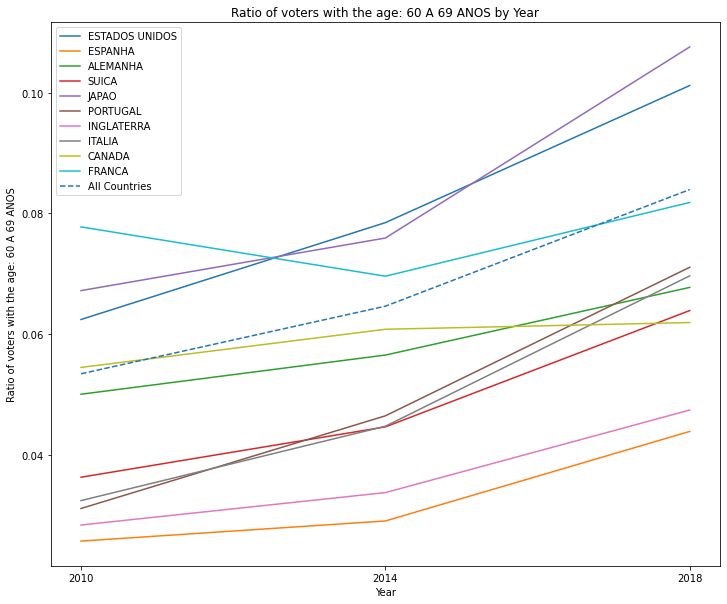

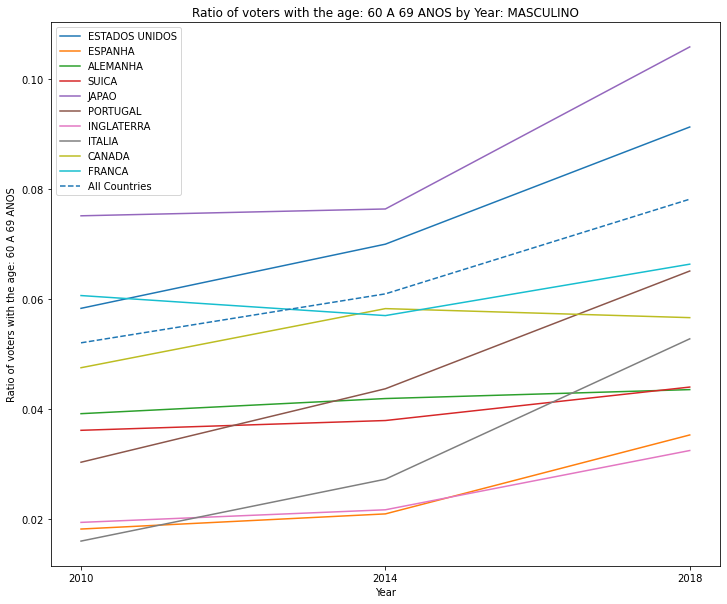

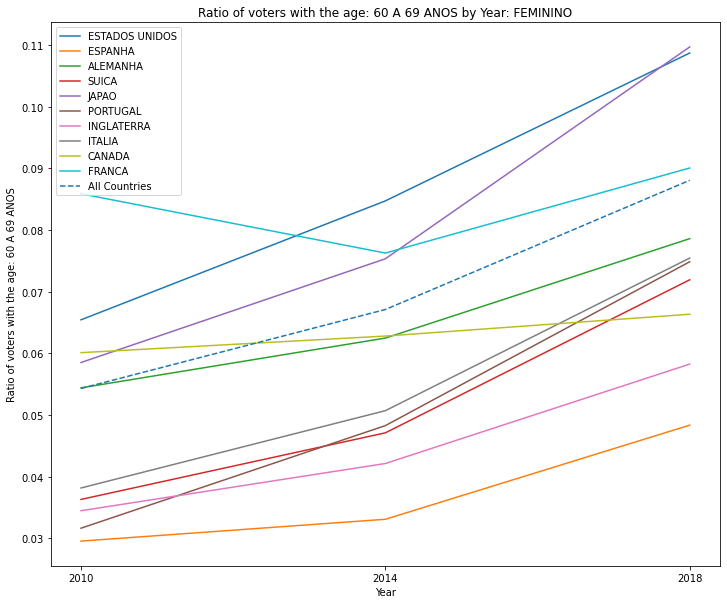

In [84]:
plot_age_by_country(top_10_for_age, df_combined, "60 A 69 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "60 A 69 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "60 A 69 ANOS", "FEMININO")

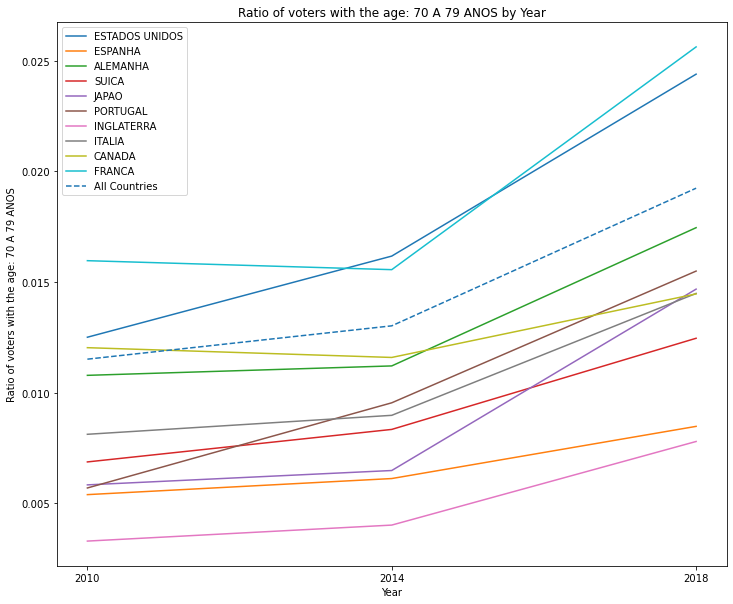

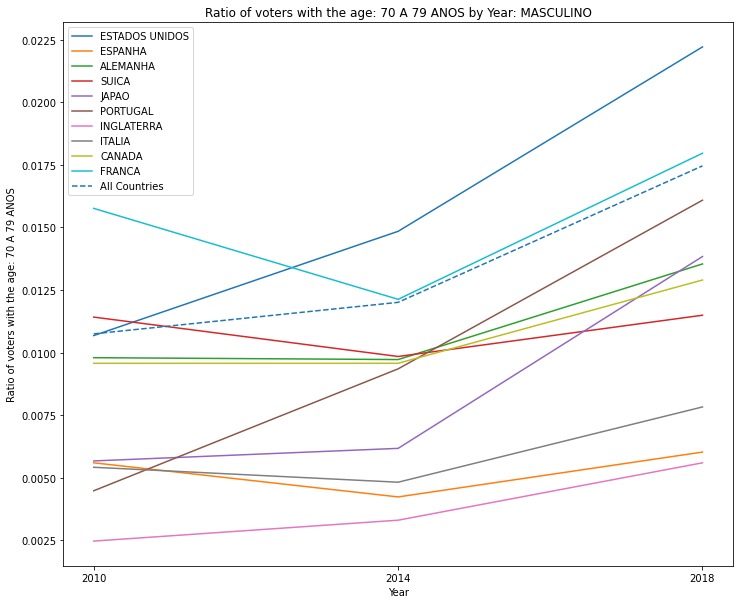

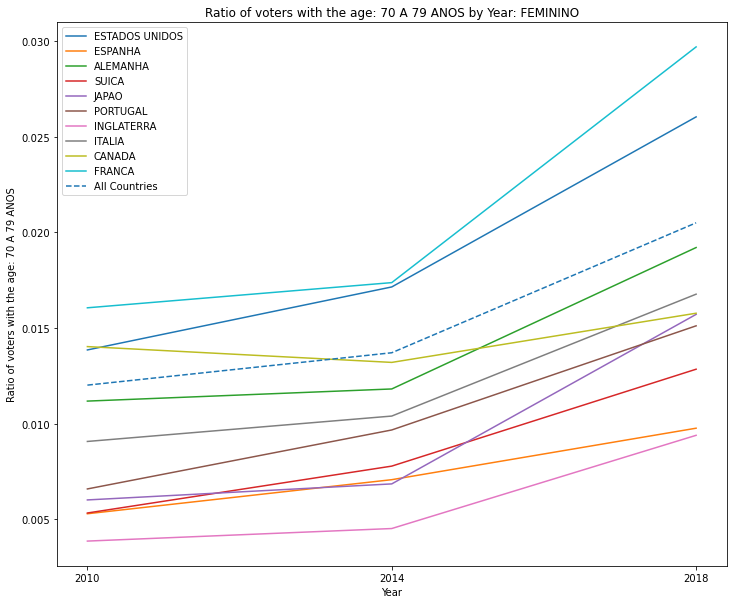

In [85]:
plot_age_by_country(top_10_for_age, df_combined, "70 A 79 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "70 A 79 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "70 A 79 ANOS", "FEMININO")

## Analysis of Voting Patterns in Top 10 Countries

In [87]:
df_1998 = pd.read_csv('../data/clean/1998_Election_Data.csv')
df_2002 = pd.read_csv('../data/clean/2002_Election_Data.csv')
df_2006 = pd.read_csv('../data/clean/2006_Election_Data.csv')
df_2010 = pd.read_csv('../data/clean/2010_Election_Data.csv')
df_2014 = pd.read_csv('../data/clean/2014_Election_Data.csv')
df_2018 = pd.read_csv('../data/clean/2018_Election_Data.csv')

In [88]:
#Create Combined Data Frame (all years)
df_combined = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
print("Aggregate Data")
df_combined

Aggregate Data


Unnamed: 0  election_year  election_round place_(zz_=_exterior)  \
0              0           1998               1                    ZZ   
1              1           1998               1                    ZZ   
2              2           1998               1                    ZZ   
3              3           1998               1                    ZZ   
4              4           1998               1                    ZZ   
...          ...            ...             ...                   ...   
5592        1534           2018               1                    ZZ   
5593        1535           2018               1                    ZZ   
5594        1536           2018               1                    ZZ   
5595        1537           2018               1                    ZZ   
5596        1538           2018               1                    ZZ   

      municipality_code municipality_name      office party_initials  \
0                 98787     AFRICA DO SUL  PRESIDENTE           PSDC   
1                 98787     AFRICA DO SUL  PRESIDENTE        PT do B   
2                 98787     AFRICA DO SUL  PRESIDENTE             PT   
3                 98787     AFRICA DO SUL  PRESIDENTE           PSDB   
4                 11100          ALEMANHA  PRESIDENTE            PTN   
...                 ...               ...         ...            ...   
5592              11142         ARGENTINA  Presidente           PODE   
5593              11266    ESTADOS UNIDOS  Presidente            PPL   
5594              11266    ESTADOS UNIDOS  Presidente           PODE   
5595              11282            FRANCA  Presidente           PODE   
5596              11142         ARGENTINA  Presidente          PATRI   

      party_number                               party_name  number_of_votes  \
0               27         PARTIDO SOCIAL DEMOCRATA CRISTAO                1   
1               70            PARTIDO TRABALHISTA DO BRASIL                3   
2               13                PARTIDO DOS TRABALHADORES               10   
3               45  PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA               54   
4               19             PARTIDO TRABALHISTA NACIONAL                1   
...            ...                                      ...              ...   
5592            19                                  PODEMOS               46   
5593            54                     PARTIDO PATRIA LIVRE                4   
5594            19                                  PODEMOS               39   
5595            19                                  PODEMOS               30   
5596            51                                 PATRIOTA               16   

      unnamed:_4  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
5592         NaN  
5593         NaN  
5594         NaN  
5595         NaN  
5596         NaN  

[5597 rows x 12 columns]

In [89]:
def get_electorate_data():
    '''
    Retrieves and combines electorate dataset (to get data on top 10 countries)
    :return: The combined electorate data
    '''
    df_1998 = pd.read_csv('../data/clean/perfil_eleitorado_1998.csv')
    df_2002 = pd.read_csv('../data/clean/perfil_eleitorado_2002.csv')
    df_2006 = pd.read_csv('../data/clean/perfil_eleitorado_2006.csv')
    df_2010 = pd.read_csv('../data/clean/perfil_eleitorado_2010.csv')
    df_2014 = pd.read_csv('../data/clean/perfil_eleitorado_2014.csv')
    df_2018 = pd.read_csv('../data/clean/perfil_eleitorado_2018.csv')
    
    df = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
    
    return df

In [92]:
def get_top_N_voting(total_data, N:int):
    '''
    Extracts the top N countries (in terms of overall population) by 
    countries
    :param total_data - The aggregate dataset (df_combined in our case)
    :param sorted_countries - A sorted dataframe of dataset elements (in our case, elements
                              sorted by total number of voters in 2018)
    :param N - The number of countries to extract
    :return A new dataframe containing only the top N countries
    '''
    
    #Extract Names of top 10 countries
    electorate = get_electorate_data()
    countries = electorate.groupby(["municipality_code", "municipality_name", "election_year"]).quantity_of_voters.sum().unstack()
    countries = countries.fillna(0)
    sorted_countries = countries.sort_values(by=[2018], ascending=False)
    
    top_N_country_names = list(pd.DataFrame(sorted_countries.reset_index()).municipality_name[:N])
    
    #Filter dataframe to only include top 10 countries
    #Source - https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
    top_N = total_data[pd.DataFrame(total_data["municipality_name"].tolist()).isin(top_N_country_names).any(1).values].reset_index()
    
    top_N = top_N[["election_year", "election_round","municipality_code","municipality_name", "office", "party_initials", "party_number","party_name", "number_of_votes" ]]

    
    return top_N

In [93]:
top_10 = get_top_N_voting(df_combined, 10)
top_10.head()

election_year  election_round  municipality_code municipality_name  \
0           1998               1              11100          ALEMANHA   
1           1998               1              11100          ALEMANHA   
2           1998               1              11100          ALEMANHA   
3           1998               1              11100          ALEMANHA   
4           1998               1              11100          ALEMANHA   

       office party_initials  party_number  \
0  PRESIDENTE            PTN            19   
1  PRESIDENTE          PRONA            56   
2  PRESIDENTE            PPS            23   
3  PRESIDENTE             PT            13   
4  PRESIDENTE           PSDB            45   

                                  party_name  number_of_votes  
0               PARTIDO TRABALHISTA NACIONAL                1  
1  PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL                1  
2                 PARTIDO POPULAR SOCIALISTA                4  
3                  PARTIDO DOS TRABALHADORES               32  
4    PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA               56

### Below, we can see the total votes for each political party by country in our entire dataset

In [94]:
top_10_votes = top_10.groupby(["municipality_name", "party_initials","election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10_votes.fillna(0)
pd.set_option("display.max_rows", None, "display.max_columns", None)
top_10_votes

election_year                       1998     2002     2006     2010     2014  \
municipality_name party_initials                                               
ALEMANHA          DC                 0.0      0.0      0.0      0.0      0.0   
                  MDB                0.0      0.0      0.0      0.0      0.0   
                  NOVO               0.0      0.0      0.0      0.0      0.0   
                  PATRI              0.0      0.0      0.0      0.0      0.0   
                  PCB                0.0      0.0      0.0     18.0     13.0   
                  PCO                0.0      6.0      0.0     11.0      2.0   
                  PDT                0.0      0.0     63.0      0.0      0.0   
                  PMN                5.0      0.0      0.0      0.0      0.0   
                  PODE               0.0      0.0      0.0      0.0      0.0   
                  PPL                0.0      0.0      0.0      0.0      0.0   
                  PPS               90.0    109.0      0.0      0.0      0.0   
                  PRONA             16.0      0.0      0.0      0.0      0.0   
                  PRP                0.0      0.0     25.0      0.0      0.0   
                  PRTB               0.0      0.0      0.0      9.0     24.0   
                  PSB                0.0     42.0      0.0      0.0   1885.0   
                  PSC                0.0      0.0      0.0      0.0     34.0   
                  PSDB             799.0    799.0   5204.0   2760.0   6152.0   
                  PSDC               1.0      0.0      4.0     18.0     14.0   
                  PSL                0.0      0.0      6.0      0.0      0.0   
                  PSN                3.0      0.0      0.0      0.0      0.0   
                  PSOL               0.0      0.0     96.0     26.0    282.0   
                  PSTU               4.0      4.0      0.0     29.0     33.0   
                  PT               417.0   1624.0   4352.0   2420.0   3171.0   
                  PT do B            8.0      0.0      0.0      0.0      0.0   
                  PTN                8.0      0.0      0.0      0.0      0.0   
                  PV                 8.0      0.0      0.0    828.0    170.0   
                  REDE               0.0      0.0      0.0      0.0      0.0   
CANADA            DC                 0.0      0.0      0.0      0.0      0.0   
                  MDB                0.0      0.0      0.0      0.0      0.0   
                  NOVO               0.0      0.0      0.0      0.0      0.0   
                  PATRI              0.0      0.0      0.0      0.0      0.0   
                  PCB                0.0      0.0      0.0      8.0     10.0   
                  PCO                0.0      2.0      0.0      2.0      0.0   
                  PDT                0.0      0.0    109.0      0.0      0.0   
                  PMN                2.0      0.0      0.0      0.0      0.0   
                  PODE               0.0      0.0      0.0      0.0      0.0   
                  PPL                0.0      0.0      0.0      0.0      0.0   
                  PPS               52.0     99.0      0.0      0.0      0.0   
                  PRONA              9.0      0.0      0.0      0.0      0.0   
                  PRP                0.0      0.0     12.0      0.0      0.0   
                  PRTB               0.0      0.0      0.0      8.0     17.0   
                  PSB                0.0     37.0      0.0      0.0   1700.0   
                  PSC                2.0      0.0      0.0      0.0     34.0   
                  PSDB             585.0    769.0   6816.0   4408.0   9167.0   
                  PSDC               0.0      0.0      4.0      8.0     15.0   
                  PSL                0.0      0.0      6.0      0.0      0.0   
                  PSOL               0.0      0.0    119.0     24.0    286.0   
                  PSTU               2.0      6.0      0.0     11.0      8.0   


### First, let's look at the total number of votes for these 10 countries by political party. As we can see below,  the PSDB has received the most votes from these countries, followed by the PT and PSL

<AxesSubplot:xlabel='party_initials'>

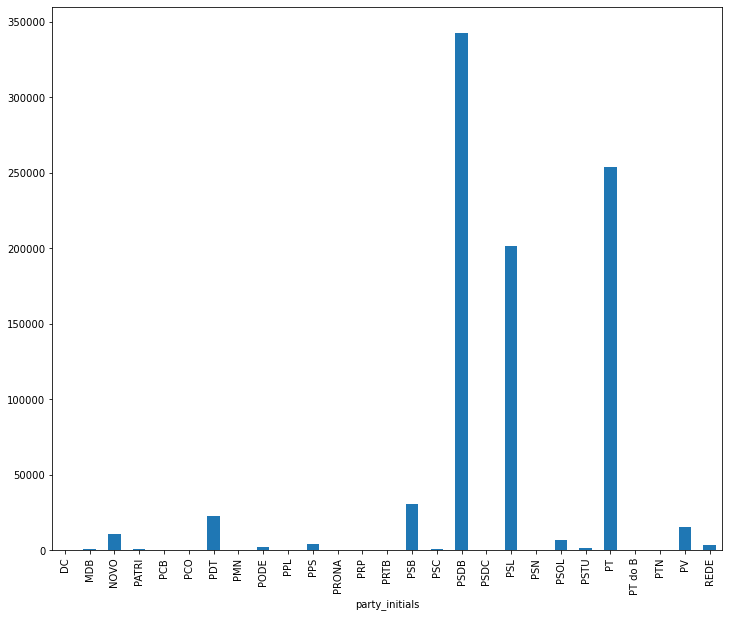

In [95]:
top_10_votes = top_10.groupby(["party_initials","municipality_name", "election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10_votes.fillna(0)
parties = top_10["party_initials"].unique()
top_10.groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar")

#### Now, let's look at trend over the past 4 elections
Here, we can see that the PSDB received the most votes in 2006-2014, but received very few votes in 2018 (in which the PSL received the most votes)

<AxesSubplot:title={'center':'2018'}, xlabel='party_initials'>

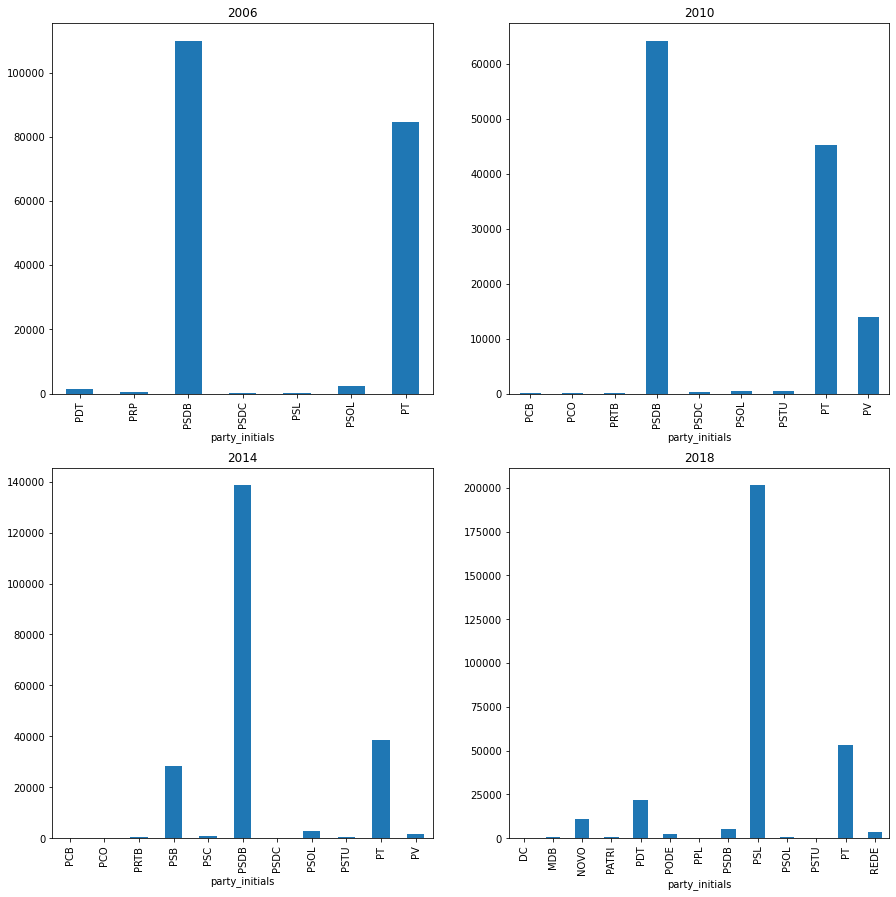

In [96]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

top_10[top_10["election_year"] == 2006].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][0], title="2006")
top_10[top_10["election_year"] == 2010].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][1], title="2010")
top_10[top_10["election_year"] == 2014].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][0], title="2014")
top_10[top_10["election_year"] == 2018].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][1], title="2018")

#### Now, let's look at votes for the individual countries in these years

In [97]:
import math
def plot_top_10_voting_patterns(df_combined, top_10, years):
    '''
    Plots the voting patterns (by party) of the top 10 countries for the given years
    as a single plot
    :param df_combined -- The combined voting dataset
    :param top_10 -- The voting data for the top 10 countries
    :param years -- The election years to plot (a List)
    '''
    #Extract countries and parties
    countries = top_10.municipality_name.unique()
    
    #params for plot size
    num_cols = 2
    num_rows = math.ceil(len(years)/2)
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,15))
    
    for idx, year in enumerate(years):
        
        row_idx, col_idx = divmod(idx, num_cols)
        
        #Extract Data for top 10 countries
        parties = top_10[(top_10["election_year"] == year)].party_initials.unique()
        parties.sort()
        votes = [0 for i in range(len(parties))]
        
        for country in countries:
            country_data = top_10[(top_10["election_year"] == year) & (top_10["municipality_name"]==country)]
            country_total_votes = country_data.number_of_votes.sum()
            for index, party in enumerate(parties):
                vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()/country_total_votes
                votes[index] = vote_total
                
            axes[row_idx][col_idx].plot(parties, votes, label=country)
            votes = [0 for i in range(len(parties))]
            
        #Plot proportion of votes for total dataset
        full_data= df_combined[(df_combined["election_year"] == year)]
        votes = [0 for i in range(len(parties))]
        total_votes_aggregate_data = full_data.number_of_votes.sum()
        
        for index, party in enumerate(parties):
            vote_total = full_data[full_data["party_initials"] == party].number_of_votes.sum()/total_votes_aggregate_data
            votes[index] = vote_total
    
        axes[row_idx][col_idx].plot(parties, votes, '--', label="All Countries")
        

        #set parameters for tick labels
        axes[row_idx][col_idx].tick_params(axis='x', which='major', labelsize=10)
        axes[row_idx][col_idx].tick_params(axis='y', which='major', labelsize=10)
        axes[row_idx][col_idx].legend(loc='best', prop={'size': 8})
        axes[row_idx][col_idx].set_xlabel("Party", fontsize=10)
        axes[row_idx][col_idx].set_ylabel("Proportion of Votes", fontsize=10)
        axes[row_idx][col_idx].set_title(str(year), fontsize=12)
    
    plt.tight_layout()
#     plt.savefig("../readme_images/top10_votes_2006-2018.png", facecolor='w')

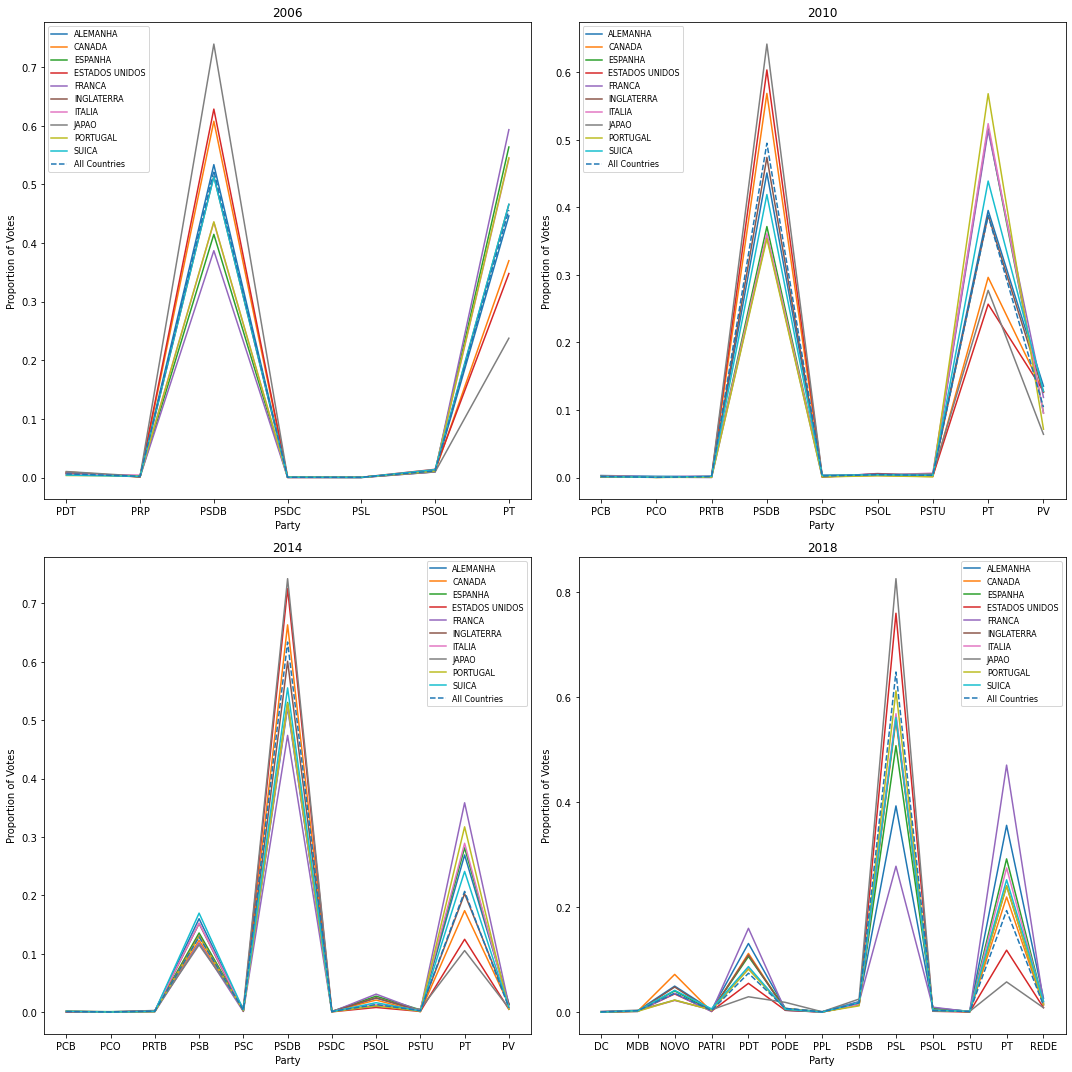

In [98]:
plot_top_10_voting_patterns(df_combined, top_10, [2006, 2010, 2014, 2018])

Above, we plot the voting patterns (in terms of which political party the electorate votes for) for country each country in the top 10 (as well as the aggregate dataset as a dashed line) for the years 2006-1018. These plots are discussed individually below.

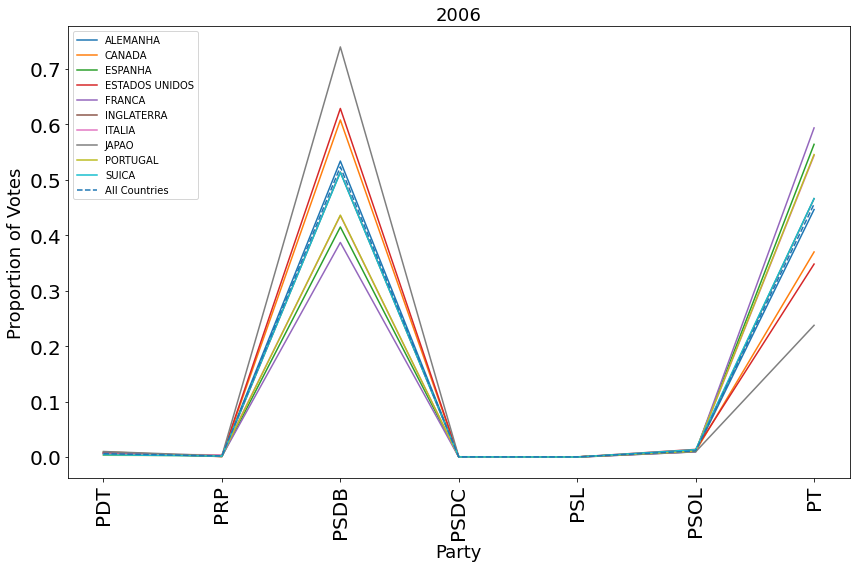

In [99]:
#========================
#2006 Analysis
# Analyze Proportion of Votes for each party in the top 10 countries (as well as proportion of votes overall)
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2006)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


#Plot proportion of votes for each country in top 10 countries
plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2006) & (top_10["municipality_name"]==country)]
    country_total_votes = country_data.number_of_votes.sum()
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()/country_total_votes
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)
    votes = [0 for i in range(len(parties))]

#Plot proportion of votes for total dataset
full_data_2006 = df_combined[(df_combined["election_year"] == 2006)]
votes = [0 for i in range(len(parties))]
total_votes_aggregate_data = full_data_2006.number_of_votes.sum()
for idx, party in enumerate(parties):
    vote_total = full_data_2006[full_data_2006["party_initials"] == party].number_of_votes.sum()/total_votes_aggregate_data
    votes[idx] = vote_total
    
plt.plot(parties, votes, '--', label="All Countries")

    
plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Proportion of Votes", fontsize=18)
plt.title("2006", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/Top_10_Voting/top10_votes_2006.png", facecolor='w')

#### 2006
Above, we plot the voting results for each country for the year 2006. We see a relatively uniform pattern among all countries, with the majority of votes going to the PDSB and PT. Interestingly, a the PT seemed to garner more votes in Portugal, Italy, and France than did the PSDB. Looking at all countries in the dataset (the dashed line), we can see the patterns from these top 10 countries follow roughly the same shape (though Japan, the US, and Canada have a higher proportion of votes for the PSDB than the dataset average and the other countries have a higher proportion of votes for the PT)

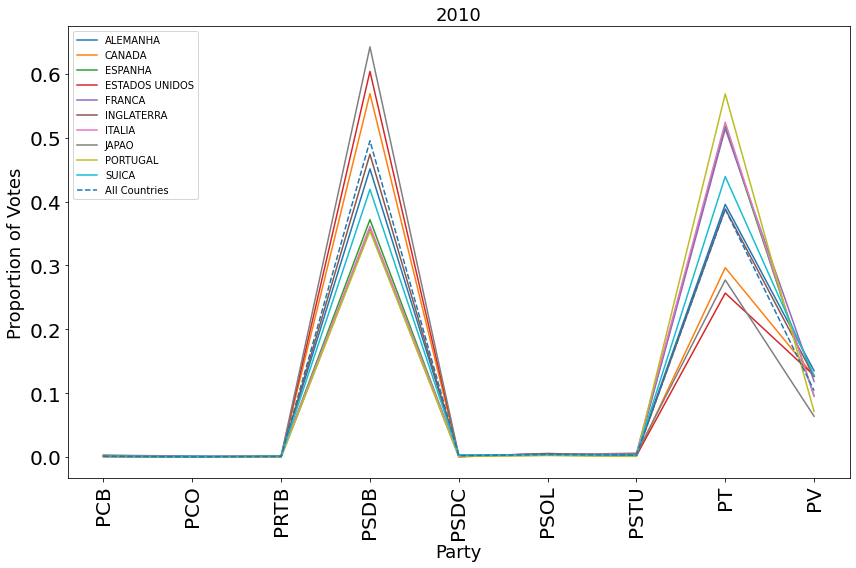

In [100]:
#========================
#2010 Analysis
# Analyze Proportion of Votes for each party in the top 10 countries (as well as proportion of votes overall)
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2010)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


#Plot proportion of votes for each country in top 10 countries
plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2010) & (top_10["municipality_name"]==country)]
    country_total_votes = country_data.number_of_votes.sum()
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()/country_total_votes
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)
    votes = [0 for i in range(len(parties))]

#Plot proportion of votes for total dataset
full_data_2010 = df_combined[(df_combined["election_year"] == 2010)]
votes = [0 for i in range(len(parties))]
total_votes_aggregate_data = full_data_2010.number_of_votes.sum()
for idx, party in enumerate(parties):
    vote_total = full_data_2010[full_data_2010["party_initials"] == party].number_of_votes.sum()/total_votes_aggregate_data
    votes[idx] = vote_total
    
plt.plot(parties, votes, '--', label="All Countries")

    
plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Proportion of Votes", fontsize=18)
plt.title("2010", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/top10_votes_2010.png", facecolor='w')

#### 2010
Above, we plot the voting results for each country for the year 2010. Again, we see a relatively uniform pattern among all countries, with the majority of votes going to the PDSB and PT. Again, a the PT seemed to garner more votes in Portugal, Italy, and France than did the PSDB and interestingly, the PV garnered a significant number of votes in the US.

Looking at all countries in the dataset (the dashed line), again, we can see the patterns from these top 10 countries follow roughly the same shape (though Japan, the US, and Canada have a higher proportion of votes for the PSDB than the dataset average and the other countries have a higher proportion of votes for the PT)

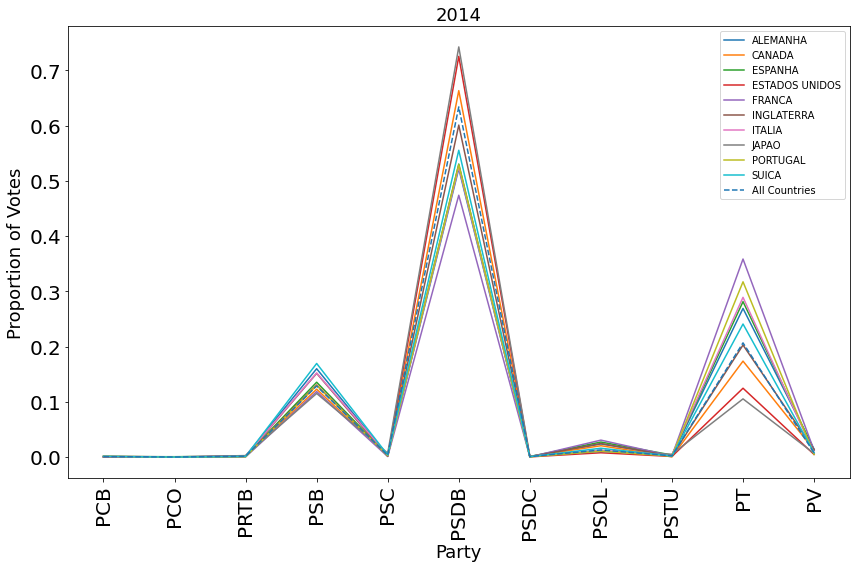

In [101]:
#========================
#2014 Analysis
# Analyze Proportion of Votes for each party in the top 10 countries (as well as proportion of votes overall)
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2014)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


#Plot proportion of votes for each country in top 10 countries
plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2014) & (top_10["municipality_name"]==country)]
    country_total_votes = country_data.number_of_votes.sum()
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()/country_total_votes
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)
    votes = [0 for i in range(len(parties))]

#Plot proportion of votes for total dataset
full_data_2014 = df_combined[(df_combined["election_year"] == 2014)]
votes = [0 for i in range(len(parties))]
total_votes_aggregate_data = full_data_2014.number_of_votes.sum()
for idx, party in enumerate(parties):
    vote_total = full_data_2014[full_data_2014["party_initials"] == party].number_of_votes.sum()/total_votes_aggregate_data
    votes[idx] = vote_total
    
plt.plot(parties, votes, '--', label="All Countries")

    
plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Proportion of Votes", fontsize=18)
plt.title("2014", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/top10_votes_2014.png", facecolor='w')

#### 2014
In 2014, we see the number of votes for the PT fall dramatically (relative to the PSDB). Meanwhile, votes for the PSB have grown significantly, with the votes for the PSB on par with the PT in the US and votes for the PT outnumbering those for the PT in Japan. Again, we see that the overall voting pattern in the dataset roughly matches these top 10 countries

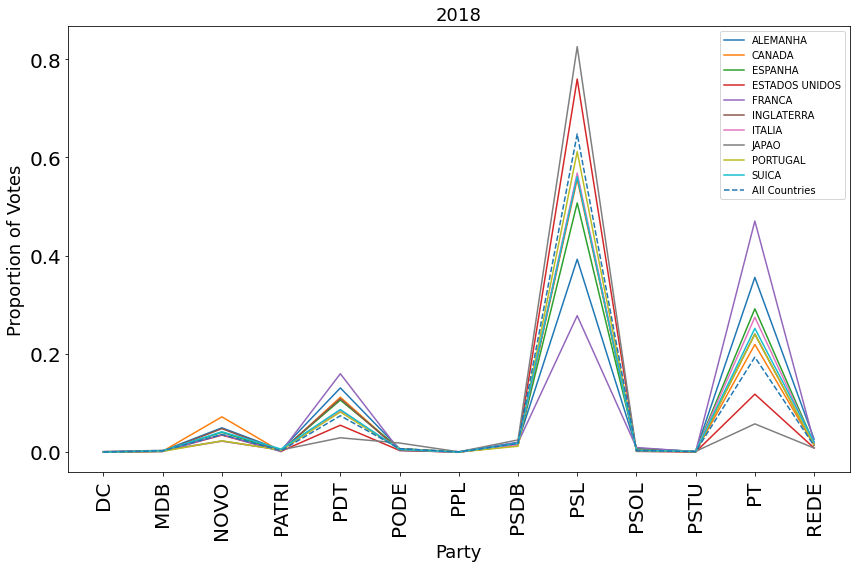

In [103]:
#========================
#2018 Analysis
# Analyze Proportion of Votes for each party in the top 10 countries (as well as proportion of votes overall)
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2018)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


#Plot proportion of votes for each country in top 10 countries
plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2018) & (top_10["municipality_name"]==country)]
    country_total_votes = country_data.number_of_votes.sum()
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()/country_total_votes
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)
    votes = [0 for i in range(len(parties))]

#Plot proportion of votes for total dataset
full_data_2018 = df_combined[(df_combined["election_year"] == 2018)]
votes = [0 for i in range(len(parties))]
total_votes_aggregate_data = full_data_2018.number_of_votes.sum()
for idx, party in enumerate(parties):
    vote_total = full_data_2018[full_data_2018["party_initials"] == party].number_of_votes.sum()/total_votes_aggregate_data
    votes[idx] = vote_total
    
plt.plot(parties, votes, '--', label="All Countries")

    
plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Proportion of Votes", fontsize=18)
plt.title("2018", fontsize=18)
plt.tight_layout()
plt.savefig("../readme_images/top10_votes_2018.png", facecolor='w')

#### 2018
In 2018, the PSL became the most-voted-for party across almost all countries. We also see some small spikes in votes for the new NOVO and PDT parties. Meanwhile, the PSDB has very few votes in all countries, while the PT continues to have some support on par with 2014 (much reduced from 2006 and 2010). 

Interesting, while overall the shape of voting proportions the total dataset matches the shape of votes for only the top 10 countries, we can see that 8 out of the 10 top 10 countrues had a higher proportion of votes for the PDT  and PT (and lower proportion for the PSL) than the dataset average. Meanwhile, voters in Japan and the US were the opposite, with a higher proportion of votes for the PSL (and lower proportion for the PT and PDT) than the dataset average.

## Voting Percentage for Top 3 Parties (PT, PSDB, PSL) Over Time

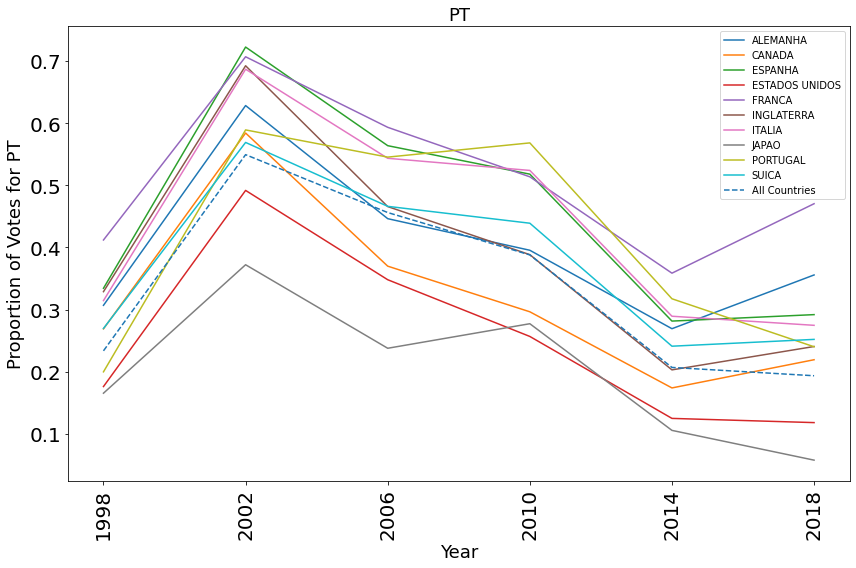

In [104]:
#========================
# Analysis for PT
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
years = [1998, 2002, 2006, 2010, 2014, 2018]
party = 'PT'
votes = [0 for i in range(len(years))]

plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["municipality_name"] == country)]
    
    for idx, year in enumerate(years):
        PST_votes = country_data[(country_data["election_year"] == year) & \
                                 (country_data["party_initials"]==party)].number_of_votes.sum()
        country_total_votes = country_data[country_data["election_year"] == year].number_of_votes.sum() 
        votes[idx] = PST_votes/country_total_votes
    
    plt.plot(years, votes, label=country)
    votes = [0 for i in range(len(years))]
    
    
    
#Plot proportion of votes for total dataset
votes = [0 for i in range(len(years))]

for idx, year in enumerate(years):
    total_votes = df_combined[(df_combined["election_year"] == year)]
    PST_votes = total_votes[total_votes['party_initials'] == party].number_of_votes.sum()
    votes[idx] = PST_votes/total_votes.number_of_votes.sum()
    
plt.plot(years, votes, '--', label="All Countries")

    

# plot configurations
plt.xticks(years, [str(i) for i in years], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend()
plt.xlabel("Year", fontsize=18)
plt.ylabel("Proportion of Votes for PT", fontsize=18)
plt.title("PT", fontsize=18)
plt.tight_layout()



# plt.savefig("../readme_images/Top_3_Parties/top3_votes_PT.png", facecolor='w')

We can see that the overall trend for PT is a sharp popularity spike in 2002, followed by gradual decrease in popularity before leveling off. Most of the countries follow this trend. What's interesting is that popularity for PT seems to have rebounded in France, Germany, and Canada in the recent years, even though whole its popularity is not increasing.

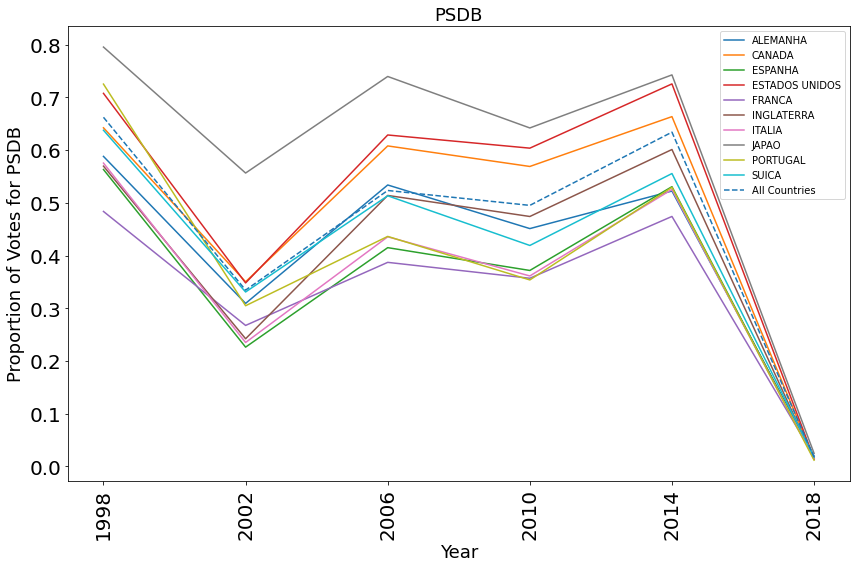

In [105]:
#========================
# Analysis for PSDB
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
years = [1998, 2002, 2006, 2010, 2014, 2018]
party = 'PSDB'
votes = [0 for i in range(len(years))]

plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["municipality_name"] == country)]
    
    for idx, year in enumerate(years):
        PST_votes = country_data[(country_data["election_year"] == year) & \
                                 (country_data["party_initials"]==party)].number_of_votes.sum()
        country_total_votes = country_data[country_data["election_year"] == year].number_of_votes.sum() 
        votes[idx] = PST_votes/country_total_votes
    
    plt.plot(years, votes, label=country)
    votes = [0 for i in range(len(years))]
    
    
    
#Plot proportion of votes for total dataset
votes = [0 for i in range(len(years))]

for idx, year in enumerate(years):
    total_votes = df_combined[(df_combined["election_year"] == year)]
    PST_votes = total_votes[total_votes['party_initials'] == party].number_of_votes.sum()
    votes[idx] = PST_votes/total_votes.number_of_votes.sum()
    
plt.plot(years, votes, '--', label="All Countries")

    

# plot configurations
plt.xticks(years, [str(i) for i in years], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend()
plt.xlabel("Year", fontsize=18)
plt.ylabel("Proportion of Votes for PSDB", fontsize=18)
plt.title("PSDB", fontsize=18)
plt.tight_layout()



# plt.savefig("../readme_images/Top_3_Parties/top3_votes_PSDB.png", facecolor='w')

For PSDB, we can see that initiall the popularity is high. During the early 2000s their popularity goes down, but it gradually recovers to almost its pre-drop heights in 2014. In 2018, the party's population goes down to essentially zero. This could be because the party disbanded or was merged with another party. All countries seem to follow this general trend, but its interesting to note that the population for PSDB is always slightly higher than average in certain countries such as Japan and the US.

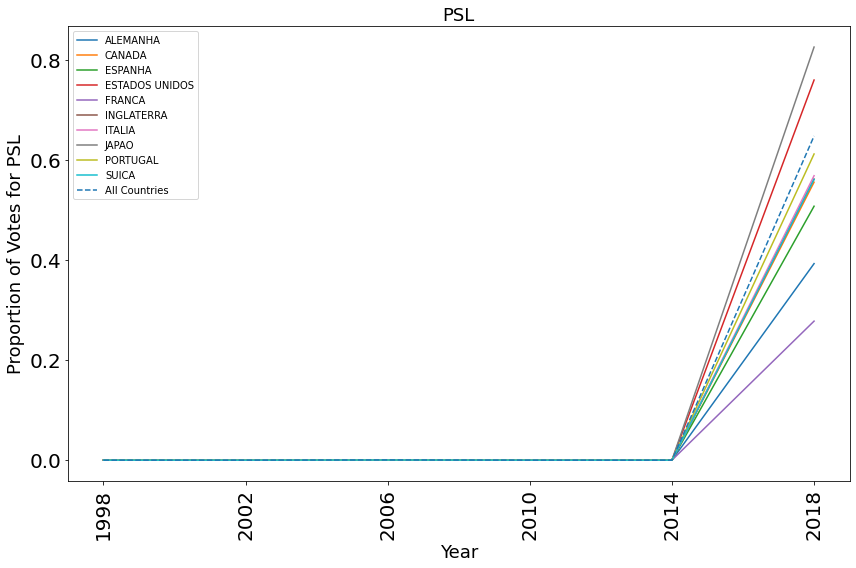

In [106]:
#========================
# Analysis for PSL
#========================

#Extract countries and parties
countries = top_10.municipality_name.unique()
years = [1998, 2002, 2006, 2010, 2014, 2018]
party = 'PSL'
votes = [0 for i in range(len(years))]

plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["municipality_name"] == country)]
    
    for idx, year in enumerate(years):
        PST_votes = country_data[(country_data["election_year"] == year) & \
                                 (country_data["party_initials"]==party)].number_of_votes.sum()
        country_total_votes = country_data[country_data["election_year"] == year].number_of_votes.sum() 
        votes[idx] = PST_votes/country_total_votes
    
    plt.plot(years, votes, label=country)
    votes = [0 for i in range(len(years))]
    
    
    
#Plot proportion of votes for total dataset
votes = [0 for i in range(len(years))]

for idx, year in enumerate(years):
    total_votes = df_combined[(df_combined["election_year"] == year)]
    PST_votes = total_votes[total_votes['party_initials'] == party].number_of_votes.sum()
    votes[idx] = PST_votes/total_votes.number_of_votes.sum()
    
plt.plot(years, votes, '--', label="All Countries")

    

# plot configurations
plt.xticks(years, [str(i) for i in years], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend()
plt.xlabel("Year", fontsize=18)
plt.ylabel("Proportion of Votes for PSL", fontsize=18)
plt.title("PSL", fontsize=18)
plt.tight_layout()



# plt.savefig("../readme_images/Top_3_Parties/top3_votes_PSL.png", facecolor='w')

From this chart, we can see that PSL is a new party that became popular in 2018. Interestingly enough, it's popularity is low in France, Germany, and Spain when compared to the other countries.

### Proportion of Electorate That Votes in Top 10 Countries - (Using  Data from Consulates)
Below, we analyze the proportion of the electorate which votes in our top 10 countries for the years 2006 to 2018. Our estimations for the total size of the populations in 2006, 2010, and 2018 are based on data available (provided by country-level consulates) on the size of these populations in 2008, 2011, and 2020 respectively.

In [107]:
import math
from collections import defaultdict
def plot_top_10_voting_proportions_consulates(top_10, years, elect_round):
    '''
    Plots the voting patterns (by party) of the top 10 countries for the given years
    as a single plot
    :param df_combined -- The combined voting dataset
    :param top_10 -- The voting data for the top 10 countries
    :param years -- The election years to plot (a List)
    :param elect_round -- The election round 
    '''
    #Extract countries and parties
    countries = top_10.municipality_name.unique()
    
    #Extract Datasets with total country populations
    df_pop_2008 = pd.read_csv('../data/clean/PopTotal_2008.csv')
    df_pop_2011 = pd.read_csv('../data/clean/PopTotal_2011.csv')
    df_pop_2014 = pd.read_csv('../data/clean/PopTotal_2014.csv')
    df_pop_2020 = pd.read_csv('../data/clean/PopTotal_2020.csv')
    
    pop_datasets = [df_pop_2008, df_pop_2011, df_pop_2014, df_pop_2020]
    
    plt.figure(figsize=(12,8))

    
    #Iterate through each country and extract voting percentage by year
    for idx, country in enumerate(countries):

        #Voting proportion by Year
        voting_proportion = [0 for i in range(len(years))]
        
        # For each year, get total number of votes and country population
        # to calculate the percentage of the population that voted
        for index, year in enumerate(years):
            
            #Extract country voting Data
            country_data = top_10[(top_10["election_year"] == year) & (top_10["municipality_name"]==country)& (top_10["election_round"]==elect_round)]
            country_total_votes = country_data.number_of_votes.sum()
            
            #Extract country population data
            pop_dataset = pop_datasets[index]
            country_total_pop = pop_dataset[pop_dataset["country"]==country].total.sum()
            
            #Calculate proportion of population that voted
            prop_votes = (int(country_total_votes)/int(country_total_pop)) *100
            voting_proportion[index] = prop_votes

        #Plot Data      
        plt.plot(years, voting_proportion, label=country)
        

    plt.xticks(years, [str(year) for year in years])
    plt.tick_params(axis='x', which='major', labelsize=20)
    plt.tick_params(axis='y', which='major', labelsize=20)
    plt.legend(loc='best', prop={'size': 10})
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("% of Total Population that Voted", fontsize=18)
    plt.title("Percentage of Estimated Total Population in Top 10 Countries that Voted (Round {})".format(elect_round), fontsize=18)
    plt.tight_layout()
    
    plt.tight_layout()
#     plt.savefig("../readme_images/Top_10_Voting/top_10_voting_percentage_round_{}_consulate.png".format(elect_round), facecolor='w')

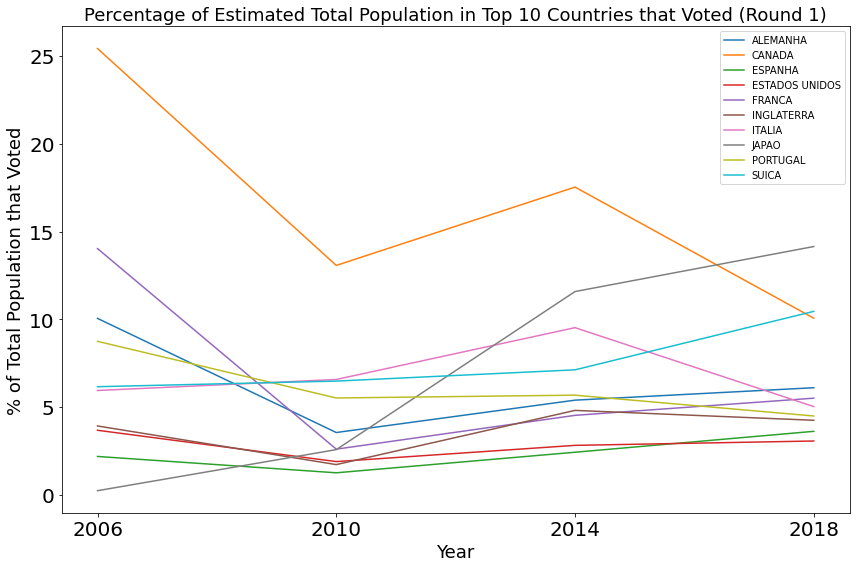

In [108]:
plot_top_10_voting_proportions_consulates(top_10, [2006, 2010, 2014, 2018], 1)

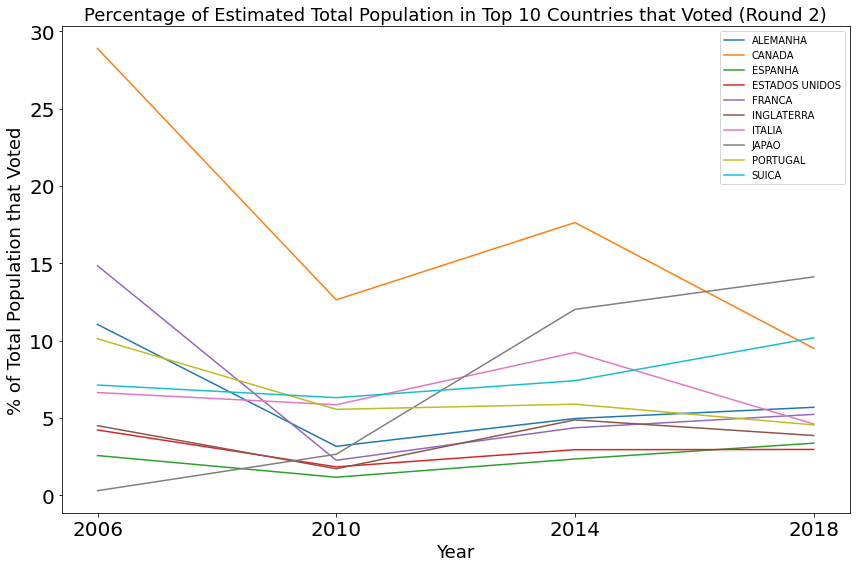

In [109]:
plot_top_10_voting_proportions_consulates(top_10, [2006, 2010, 2014, 2018], 2)

Above, we plot the percentage of the electorate population (based on estimates provided by consulates) which voted in rounds 1 and 2 of the 2006-2018 elections. There are a few key trends which immediately emerge:
* Overall, the percentage of the population which votes has been less than 20% in all years (except for in Canada, which had over 25% of its population vote in both round in 2006). 
* In the US, England, and Spain, the percentage of the population which voted around or less than 5% across all years analyzed.
* Voting in Japan (as a % of total population) has been increased in all years, with Japan having the highest percentage of voters (out of total population) in 2018.

### Proportion of Electorate That Votes in Top 10 Countries - (Using Electorate Data)
Below, we analyze the proportion of the electorate which votes in our top 10 countries for the years 2010-2018 when using the electorate data (with only voters with ages > 18) to estimate total population with a given country.

In [111]:
import math
from collections import defaultdict
def plot_top_10_voting_proportions_electorate(df_combined, top_10, elect_round):
    '''
    Plots the voting patterns (by party) of the top 10 countries for the given years
    as a single plot
    :param df_combined -- The combined voting dataset
    :param top_10 -- The voting data for the top 10 countries
    :param elect_round -- The election round 
    '''
    
    #Helper subroutine to filter out voters under the age of 18
    def filter_electorate_by_votinge_age(df):
        
        #Set of valid voting ages
        valid_ages = ["18 A 20 ANOS", 
                         "21 A 24 ANOS", 
                         "25 A 34 ANOS", 
                         "35 A 44 ANOS", 
                         "45 A 59 ANOS",
                         "60 A 69 ANOS",
                         "70 A 79 ANOS",
                         "SUPERIOR A ANOS",
                         ]
        
        df_filtered = df[df["age_group_description"].isin(valid_ages)]
        return df_filtered
    
    #Get Electorate Data and filter so that only persons aged > 18 are included
    electorate = get_electorate_data()
    electorate = filter_electorate_by_votinge_age(electorate)
    
    #Extract countries for top 10
    countries = top_10.municipality_name.unique()
    
    #Extract dataset years
    years = [2010, 2014, 2018]
    
    plt.figure(figsize=(12,8))

    
    #Iterate through each country and extract voting percentage by year
    for idx, country in enumerate(countries):

        #Voting proportion by Year
        voting_proportion = [0 for i in range(len(years))]
        
        # For each year, get total number of votes and country population
        # to calculate the percentage of the population that voted
        for index, year in enumerate(years):
            
            #Extract country voting Data
            country_data = top_10[(top_10["election_year"] == year) & (top_10["municipality_name"]==country)& (top_10["election_round"]==elect_round)]
            country_total_votes = country_data.number_of_votes.sum()
            
            #Extract electorate data
            pop_dataset = electorate[(electorate["election_year"] == year)& (electorate["municipality_name"]==country)]
            country_total_pop = pop_dataset.quantity_of_voters.sum()
            
            #Calculate proportion of population that voted
            prop_votes = (int(country_total_votes)/int(country_total_pop)) *100
            voting_proportion[index] = prop_votes

        #Plot Data      
        plt.plot(years, voting_proportion, label=country)
    
    #Add Trend line for Total Dataset
    voting_proportion_avg = [0 for i in range(len(years))]
    for index, year in enumerate(years):
        total_votes = df_combined[(df_combined["election_year"] == year) & (df_combined["election_round"]==elect_round)].number_of_votes.sum()
        electorate_pop = electorate[(electorate["election_year"] == year)].quantity_of_voters.sum()
        prop_votes = (int(total_votes)/int(electorate_pop)) *100
        voting_proportion_avg[index] = prop_votes
    
    #Plot dataset average
    plt.plot(years, voting_proportion_avg, '--', label="All Countries")
        

    plt.xticks(years, [str(year) for year in years])
    plt.tick_params(axis='x', which='major', labelsize=20)
    plt.tick_params(axis='y', which='major', labelsize=20)
    plt.legend(loc='best', prop={'size': 10})
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("% of Total Population that Voted", fontsize=18)
    plt.title("Percentage of Electorate in Top 10 Countries that Voted (Round {})".format(elect_round), fontsize=18)
    plt.tight_layout()
    
    plt.tight_layout()
#     plt.savefig("../readme_images/Top_10_Voting/top_10_voting_percentage_round_{}_electorate.png".format(elect_round), facecolor='w')

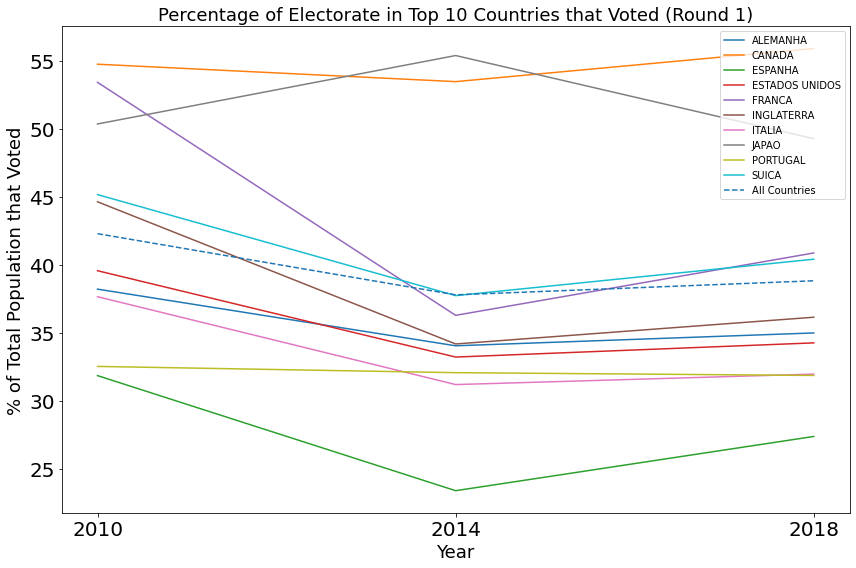

In [112]:
plot_top_10_voting_proportions_electorate(df_combined, top_10, 1)

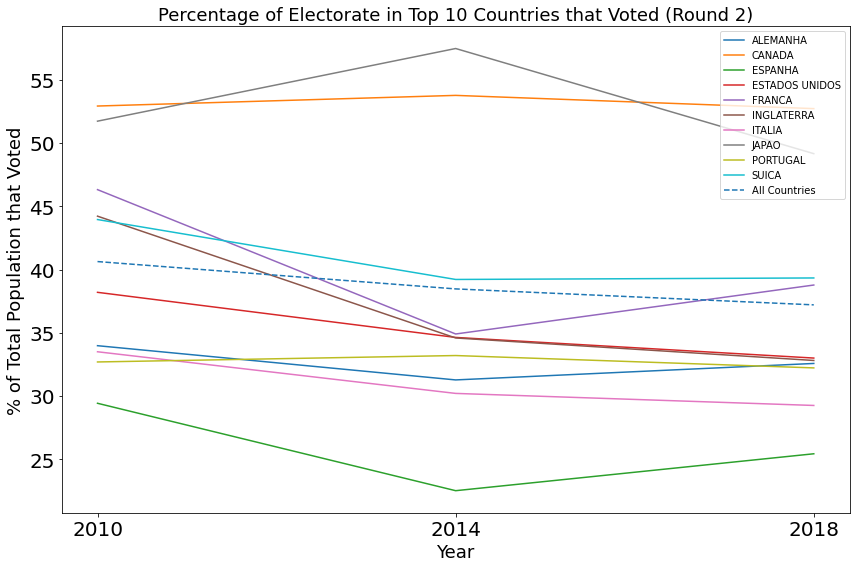

In [113]:
plot_top_10_voting_proportions_electorate(df_combined, top_10, 2)

Above, we plot the percentage of the electorate population (with the estimation for total population based on "quantity of voters" feature in the electorate datasets for members of the electorate who are over the age of 18) which voted in rounds 1 and 2 of the 2010-2018 elections. There are a couple of important takeways from this data:
* With this estimation, we can see that voters in Japan, Canada, and Switzerland tend to have a higher rate of voter turnout than the dataset average (which is around 40%).
* Meanwhile, voter turnout in the US and Italy is not only below average, but actually decreased in Round 2 for every year analyzed.
* Among the top 10 countries, Spain has the lowest voter turnout, with less than 35% of the electorate voting in either round across all 3 years